In [165]:
import numpy as np
import pandas as pd
import pyodbc
import sqlalchemy as sa
from sqlalchemy import create_engine, text, event
import urllib

In [166]:
path= r'C:\Users\jcalabozo\Desktop\TechBI_MachineLearning\Practica Final\02 - URG Churn Model\Train.csv'
path = path.replace('\\','/')

df = pd.read_csv(path, sep=';')
df.head()

NumeroDeAfiliado  Secuencia  CodigoDeSucursal  \
0            680824          1                 2   
1            680836          1                 2   
2            680842          1                 2   
3            680847          0                 2   
4            914882          0                 1   

                 ApellidoAfiliado  AnioIndicador  MesIndicador TipoAfiliacion  \
0  LENCINAS                                 2021             4     Voluntario   
1  PRATO                                    2021             4     Voluntario   
2  VAZQUEZ                                  2009             9     Voluntario   
3  GONZALEZ                                 2009             1     Individual   
4  AGUIRRE                                  2021             4     Voluntario   

  DescripcionDeSexo EstadoMesIndicadores              Convenio  ...  \
0          Femenino               Activo                 SUOEM  ...   
1         Masculino               Activo                  UEPC  ...   
2         Masculino           Suspendido                 SUOEM  ...   
3          Femenino           Suspendido           SinConvenio  ...   
4          Femenino               Activo  AMR MUTUAL AFILIADOS  ...   

  GSoloAttBanales GSoloAttCr’ticas GSinAtenciones GConAttAutoyCriticas  \
0               N                N              N                    S   
1               N                S              N                    N   
2               S                N              N                    N   
3               N                N              S                    N   
4               N                N              N                    S   

   GSinExpAuto  GSinExpCriticas  AntiguedadMeses  AntiguedadSinPromo  \
0            N                N              127                 127   
1            S                N               36                  36   
2            N                S               14                  14   
3            S                S                6                   0   
4            N                N              127                 127   

   EstadoMora  BajaTarget  
0      Activo           0  
1      Activo           0  
2  Suspendido           1  
3  Suspendido           1  
4      Activo           0  

[5 rows x 39 columns]

In [167]:
df = df.rename(columns = {'GSoloAttCr’ticas': 'GSoloAttCriticas'})
df = df.rename(columns = {'ISoloAttCr’ticas': 'ISoloAttCriticas'})


In [168]:
df.columns.tolist()

['NumeroDeAfiliado',
 'Secuencia',
 'CodigoDeSucursal',
 'ApellidoAfiliado',
 'AnioIndicador',
 'MesIndicador',
 'TipoAfiliacion',
 'DescripcionDeSexo',
 'EstadoMesIndicadores',
 'Convenio',
 'DescripcionDeTipoDePago',
 'DescripcionDeInstitucionDeCobro',
 'UsoServicioAlgunaVez',
 'ConAtencionAnulada',
 'Edad',
 'QIntegrantes',
 'QAttAUTOIndividuo',
 'QAttCriticasIndividuo',
 'QAttSeguimientoIndividuo',
 'QAttVirtualesIndividuo',
 'QAttOtrosIndividuo',
 'CantidadPersonasPagan',
 'CantidadPeriodos',
 'ISoloAttBanales',
 'ISoloAttCriticas',
 'ISinAtenciones',
 'IConAttAutoyCriticas',
 'ISinExpAuto',
 'ISinExpCriticas',
 'GSoloAttBanales',
 'GSoloAttCriticas',
 'GSinAtenciones',
 'GConAttAutoyCriticas',
 'GSinExpAuto',
 'GSinExpCriticas',
 'AntiguedadMeses',
 'AntiguedadSinPromo',
 'EstadoMora',
 'BajaTarget']

In [169]:
"""server = '192.168.1.166'
database = 'URG_Churn_Model'
username = 'dbuser'
password = 'Tech.BI.1387'
driver = '{ODBC Driver 17 for SQL Server}'
params = 'DRIVER='+driver + ';SERVER='+server + ';PORT=1433;DATABASE=' + database + ';UID=' + username + ';PWD=' + password


db_params = urllib.parse.quote_plus(params)

engine = sa.create_engine("mssql+pyodbc:///?odbc_connect={}".format(db_params))

@event.listens_for(engine, "before_cursor_execute")
def receive_before_cursor_execute(
       conn, cursor, statement, params, context, executemany
        ):
            if executemany:
                cursor.fast_executemany = True
"""


'server = \'192.168.1.166\'\ndatabase = \'URG_Churn_Model\'\nusername = \'dbuser\'\npassword = \'Tech.BI.1387\'\ndriver = \'{ODBC Driver 17 for SQL Server}\'\nparams = \'DRIVER=\'+driver + \';SERVER=\'+server + \';PORT=1433;DATABASE=\' + database + \';UID=\' + username + \';PWD=\' + password\n\n\ndb_params = urllib.parse.quote_plus(params)\n\nengine = sa.create_engine("mssql+pyodbc:///?odbc_connect={}".format(db_params))\n\n@event.listens_for(engine, "before_cursor_execute")\ndef receive_before_cursor_execute(\n       conn, cursor, statement, params, context, executemany\n        ):\n            if executemany:\n                cursor.fast_executemany = True\n'

In [170]:
"""table_name = 'Train'
df.to_sql(table_name,engine,index=False,if_exists="replace",schema="dbo")
"""

'table_name = \'Train\'\ndf.to_sql(table_name,engine,index=False,if_exists="replace",schema="dbo")\n'

In [171]:
"""
# Configuración de la conexión a la base de datos SQL Server
server = '192.168.1.166'
database = 'URG_Churn_Model'
username = 'dbuser'
password = 'Tech.BI.1387'
driver = '{ODBC Driver 17 for SQL Server}'  # Asegúrate de tener el controlador correcto instalado


# Establecer la cadena de conexión a la base de datos
conn_str = f"DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}"

# Establecer la conexión con la base de datos
conn = pyodbc.connect(conn_str)

# Crear un cursor para ejecutar consultas SQL
cursor = conn.cursor()

# Nombre de la tabla en la base de datos donde se importará el archivo de Excel
table_name = 'Train'

# Eliminar la tabla si ya existe (opcional)
#query = f"TRUNCATE TABLE  {table_name}"

#df = pd.read_sql(query, conn)
#conn.close()
df.to_sql(table_name, conn, if_exists='replace', index=False)
#print("¡Archivo de Excel importado correctamente en la base de datos!")
"""

'\n# Configuración de la conexión a la base de datos SQL Server\nserver = \'192.168.1.166\'\ndatabase = \'URG_Churn_Model\'\nusername = \'dbuser\'\npassword = \'Tech.BI.1387\'\ndriver = \'{ODBC Driver 17 for SQL Server}\'  # Asegúrate de tener el controlador correcto instalado\n\n\n# Establecer la cadena de conexión a la base de datos\nconn_str = f"DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}"\n\n# Establecer la conexión con la base de datos\nconn = pyodbc.connect(conn_str)\n\n# Crear un cursor para ejecutar consultas SQL\ncursor = conn.cursor()\n\n# Nombre de la tabla en la base de datos donde se importará el archivo de Excel\ntable_name = \'Train\'\n\n# Eliminar la tabla si ya existe (opcional)\n#query = f"TRUNCATE TABLE  {table_name}"\n\n#df = pd.read_sql(query, conn)\n#conn.close()\ndf.to_sql(table_name, conn, if_exists=\'replace\', index=False)\n#print("¡Archivo de Excel importado correctamente en la base de datos!")\n'

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304337 entries, 0 to 304336
Data columns (total 39 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   NumeroDeAfiliado                 304337 non-null  int64 
 1   Secuencia                        304337 non-null  int64 
 2   CodigoDeSucursal                 304337 non-null  int64 
 3   ApellidoAfiliado                 304337 non-null  object
 4   AnioIndicador                    304337 non-null  int64 
 5   MesIndicador                     304337 non-null  int64 
 6   TipoAfiliacion                   304337 non-null  object
 7   DescripcionDeSexo                303647 non-null  object
 8   EstadoMesIndicadores             304337 non-null  object
 9   Convenio                         304337 non-null  object
 10  DescripcionDeTipoDePago          304314 non-null  object
 11  DescripcionDeInstitucionDeCobro  294823 non-null  object
 12  UsoServicioAlgun

In [173]:
#Completa valores nulos

df['DescripcionDeTipoDePago']=df['DescripcionDeTipoDePago'].fillna('N/A')
df['DescripcionDeInstitucionDeCobro']=df['DescripcionDeInstitucionDeCobro'].fillna('N/A')
df['DescripcionDeSexo']=df['DescripcionDeSexo'].fillna('Indefinido')


In [174]:
# retrieve all labels and store in a list
columnas = df.columns.tolist()

# iterate over the list to print all unique values of each column in the dataframe
for i in columnas:
    print(i,':',df[i].unique())

NumeroDeAfiliado : [ 680824  680836  680842 ... 1135626 1135639 1135659]
Secuencia : [ 1  0  3  2  5  4  6  7 38  9  8 10 11 14 15 17 12 25 16 13 20 24 32 18
 30 35 19 23 33 22 34 21 28 29 31 40 41 42 36 26 44 39 27 43 37 46 45]
CodigoDeSucursal : [2 1]
ApellidoAfiliado : ['LENCINAS                      ' 'PRATO                         '
 'VAZQUEZ                       ' ... 'ROTILI MASTROGIUSEPPE         '
 'CZAJKOWSKI                    ' 'GIGENA RUARTE                 ']
AnioIndicador : [2021 2009 2011 2017 2018 2010 2019 2008 2016 2012 2015 2020 2014 2013
 2007 2006]
MesIndicador : [ 4  9  1  6  5 11 12  8 10  3  7  2]
TipoAfiliacion : ['Voluntario' 'Individual']
DescripcionDeSexo : ['Femenino' 'Masculino' 'Indefinido']
EstadoMesIndicadores : ['Activo' 'Suspendido']
Convenio : ['SUOEM' 'UEPC' 'SinConvenio' 'AMR MUTUAL AFILIADOS'
 'OBRA SOCIAL UNR - ACTIVOS' 'IPAM SIN COSEGURO' 'IPAM RECAUDACION - UG'
 'MIC' 'SEP' 'DASPU' 'AMEN' 'CAJA DE PREVISION SOCIAL DE LA'
 'CAJA DE JUBILACIONE

In [175]:
#Se eliminan columnas no relevantes

df=df.drop(columns=['NumeroDeAfiliado', 'ApellidoAfiliado'])

In [176]:
"""df['Secuencia']=df['Secuencia'].astype('Float64')
df['MesIndicador']=df['MesIndicador'].astype('Float64')
df['CantidadPersonasPagan']=df['CantidadPersonasPagan'].astype('Float64')
"""

"df['Secuencia']=df['Secuencia'].astype('Float64')\ndf['MesIndicador']=df['MesIndicador'].astype('Float64')\ndf['CantidadPersonasPagan']=df['CantidadPersonasPagan'].astype('Float64')\n"

In [177]:
"""df[df.select_dtypes(include=np.number).columns]=df[df.select_dtypes(include=np.number).columns].astype('Float64')
"""

"df[df.select_dtypes(include=np.number).columns]=df[df.select_dtypes(include=np.number).columns].astype('Float64')\n"

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304337 entries, 0 to 304336
Data columns (total 37 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   Secuencia                        304337 non-null  int64 
 1   CodigoDeSucursal                 304337 non-null  int64 
 2   AnioIndicador                    304337 non-null  int64 
 3   MesIndicador                     304337 non-null  int64 
 4   TipoAfiliacion                   304337 non-null  object
 5   DescripcionDeSexo                304337 non-null  object
 6   EstadoMesIndicadores             304337 non-null  object
 7   Convenio                         304337 non-null  object
 8   DescripcionDeTipoDePago          304337 non-null  object
 9   DescripcionDeInstitucionDeCobro  304337 non-null  object
 10  UsoServicioAlgunaVez             304337 non-null  object
 11  ConAtencionAnulada               304337 non-null  object
 12  Edad            

In [179]:
# Generate descriptive statistics
df.describe().T

count         mean          std     min     25%  \
Secuencia                 304337.0     1.485304     1.828241     0.0     0.0   
CodigoDeSucursal          304337.0     1.624752     0.484188     1.0     1.0   
AnioIndicador             304337.0  2016.773928     4.476828  2006.0  2013.0   
MesIndicador              304337.0     5.563809     3.002197     1.0     4.0   
Edad                      304337.0    41.717484    32.907264     0.0    20.0   
QIntegrantes              304337.0     3.587273     2.130944     1.0     2.0   
QAttAUTOIndividuo         304337.0     4.767422     9.564825     0.0     0.0   
QAttCriticasIndividuo     304337.0     0.701410     2.753228     0.0     0.0   
QAttSeguimientoIndividuo  304337.0     0.036082     0.186494     0.0     0.0   
QAttVirtualesIndividuo    304337.0     0.152367     0.359377     0.0     0.0   
QAttOtrosIndividuo        304337.0     0.000273     0.016512     0.0     0.0   
CantidadPersonasPagan     304337.0     0.344963     0.476420     0.0     0.0   
CantidadPeriodos          304337.0   966.684383  2915.939467     0.0     0.0   
AntiguedadMeses           304337.0    40.684048    41.390259     0.0     9.0   
AntiguedadSinPromo        304337.0    35.579098    42.242089     0.0     4.0   
BajaTarget                304337.0     0.666137     0.471592     0.0     0.0   

                             50%     75%     max  
Secuencia                    1.0     2.0    46.0  
CodigoDeSucursal             2.0     2.0     2.0  
AnioIndicador             2018.0  2021.0  2021.0  
MesIndicador                 4.0     8.0    12.0  
Edad                        39.0    60.0   300.0  
QIntegrantes                 3.0     5.0    27.0  
QAttAUTOIndividuo            1.0     5.0   517.0  
QAttCriticasIndividuo        0.0     0.0   473.0  
QAttSeguimientoIndividuo     0.0     0.0     1.0  
QAttVirtualesIndividuo       0.0     0.0     1.0  
QAttOtrosIndividuo           0.0     0.0     1.0  
CantidadPersonasPagan        0.0     1.0     2.0  
CantidadPeriodos             0.0     4.0  9999.0  
AntiguedadMeses             23.0    62.0   185.0  
AntiguedadSinPromo          17.0    55.0   185.0  
BajaTarget                   1.0     1.0     1.0

In [180]:
# list of numerical features
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['Secuencia', 'CodigoDeSucursal', 'AnioIndicador', 'MesIndicador',
       'Edad', 'QIntegrantes', 'QAttAUTOIndividuo', 'QAttCriticasIndividuo',
       'QAttSeguimientoIndividuo', 'QAttVirtualesIndividuo',
       'QAttOtrosIndividuo', 'CantidadPersonasPagan', 'CantidadPeriodos',
       'AntiguedadMeses', 'AntiguedadSinPromo', 'BajaTarget'],
      dtype='object')

In [181]:
# list of categorical features
cat_cols = df.drop(columns=['Convenio']).select_dtypes(include=object).columns
#cat_cols = cat_cols.delete(4)



In [182]:
cat_cols

Index(['TipoAfiliacion', 'DescripcionDeSexo', 'EstadoMesIndicadores',
       'DescripcionDeTipoDePago', 'DescripcionDeInstitucionDeCobro',
       'UsoServicioAlgunaVez', 'ConAtencionAnulada', 'ISoloAttBanales',
       'ISoloAttCriticas', 'ISinAtenciones', 'IConAttAutoyCriticas',
       'ISinExpAuto', 'ISinExpCriticas', 'GSoloAttBanales', 'GSoloAttCriticas',
       'GSinAtenciones', 'GConAttAutoyCriticas', 'GSinExpAuto',
       'GSinExpCriticas', 'EstadoMora'],
      dtype='object')

In [183]:
# import matplotlib and seaborn for visualization
from matplotlib import pyplot as plt
import seaborn as sns
import math

# Univariate visualization of categorical features
def categorical_feature_func(cat_cols, data, plot_columnas):
     
     plot_filas = math.ceil(len(cat_cols)/plot_columnas)
     fig, axs = plt.subplots(plot_filas,plot_columnas, figsize=(12*plot_columnas,10*plot_filas))
     
     for index, col in enumerate(cat_cols):
          axs_fila=index // plot_columnas
          axs_col=index % plot_columnas
          sns.countplot( x=col,data=data, ax = axs[axs_fila][axs_col])
          ax=axs[axs_fila][axs_col]
          ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
          ax.tick_params(axis='both', labelsize=20)
          ax.set_xlabel(col, fontsize=20)  
          ax.set_ylabel('Count', fontsize=20)
          



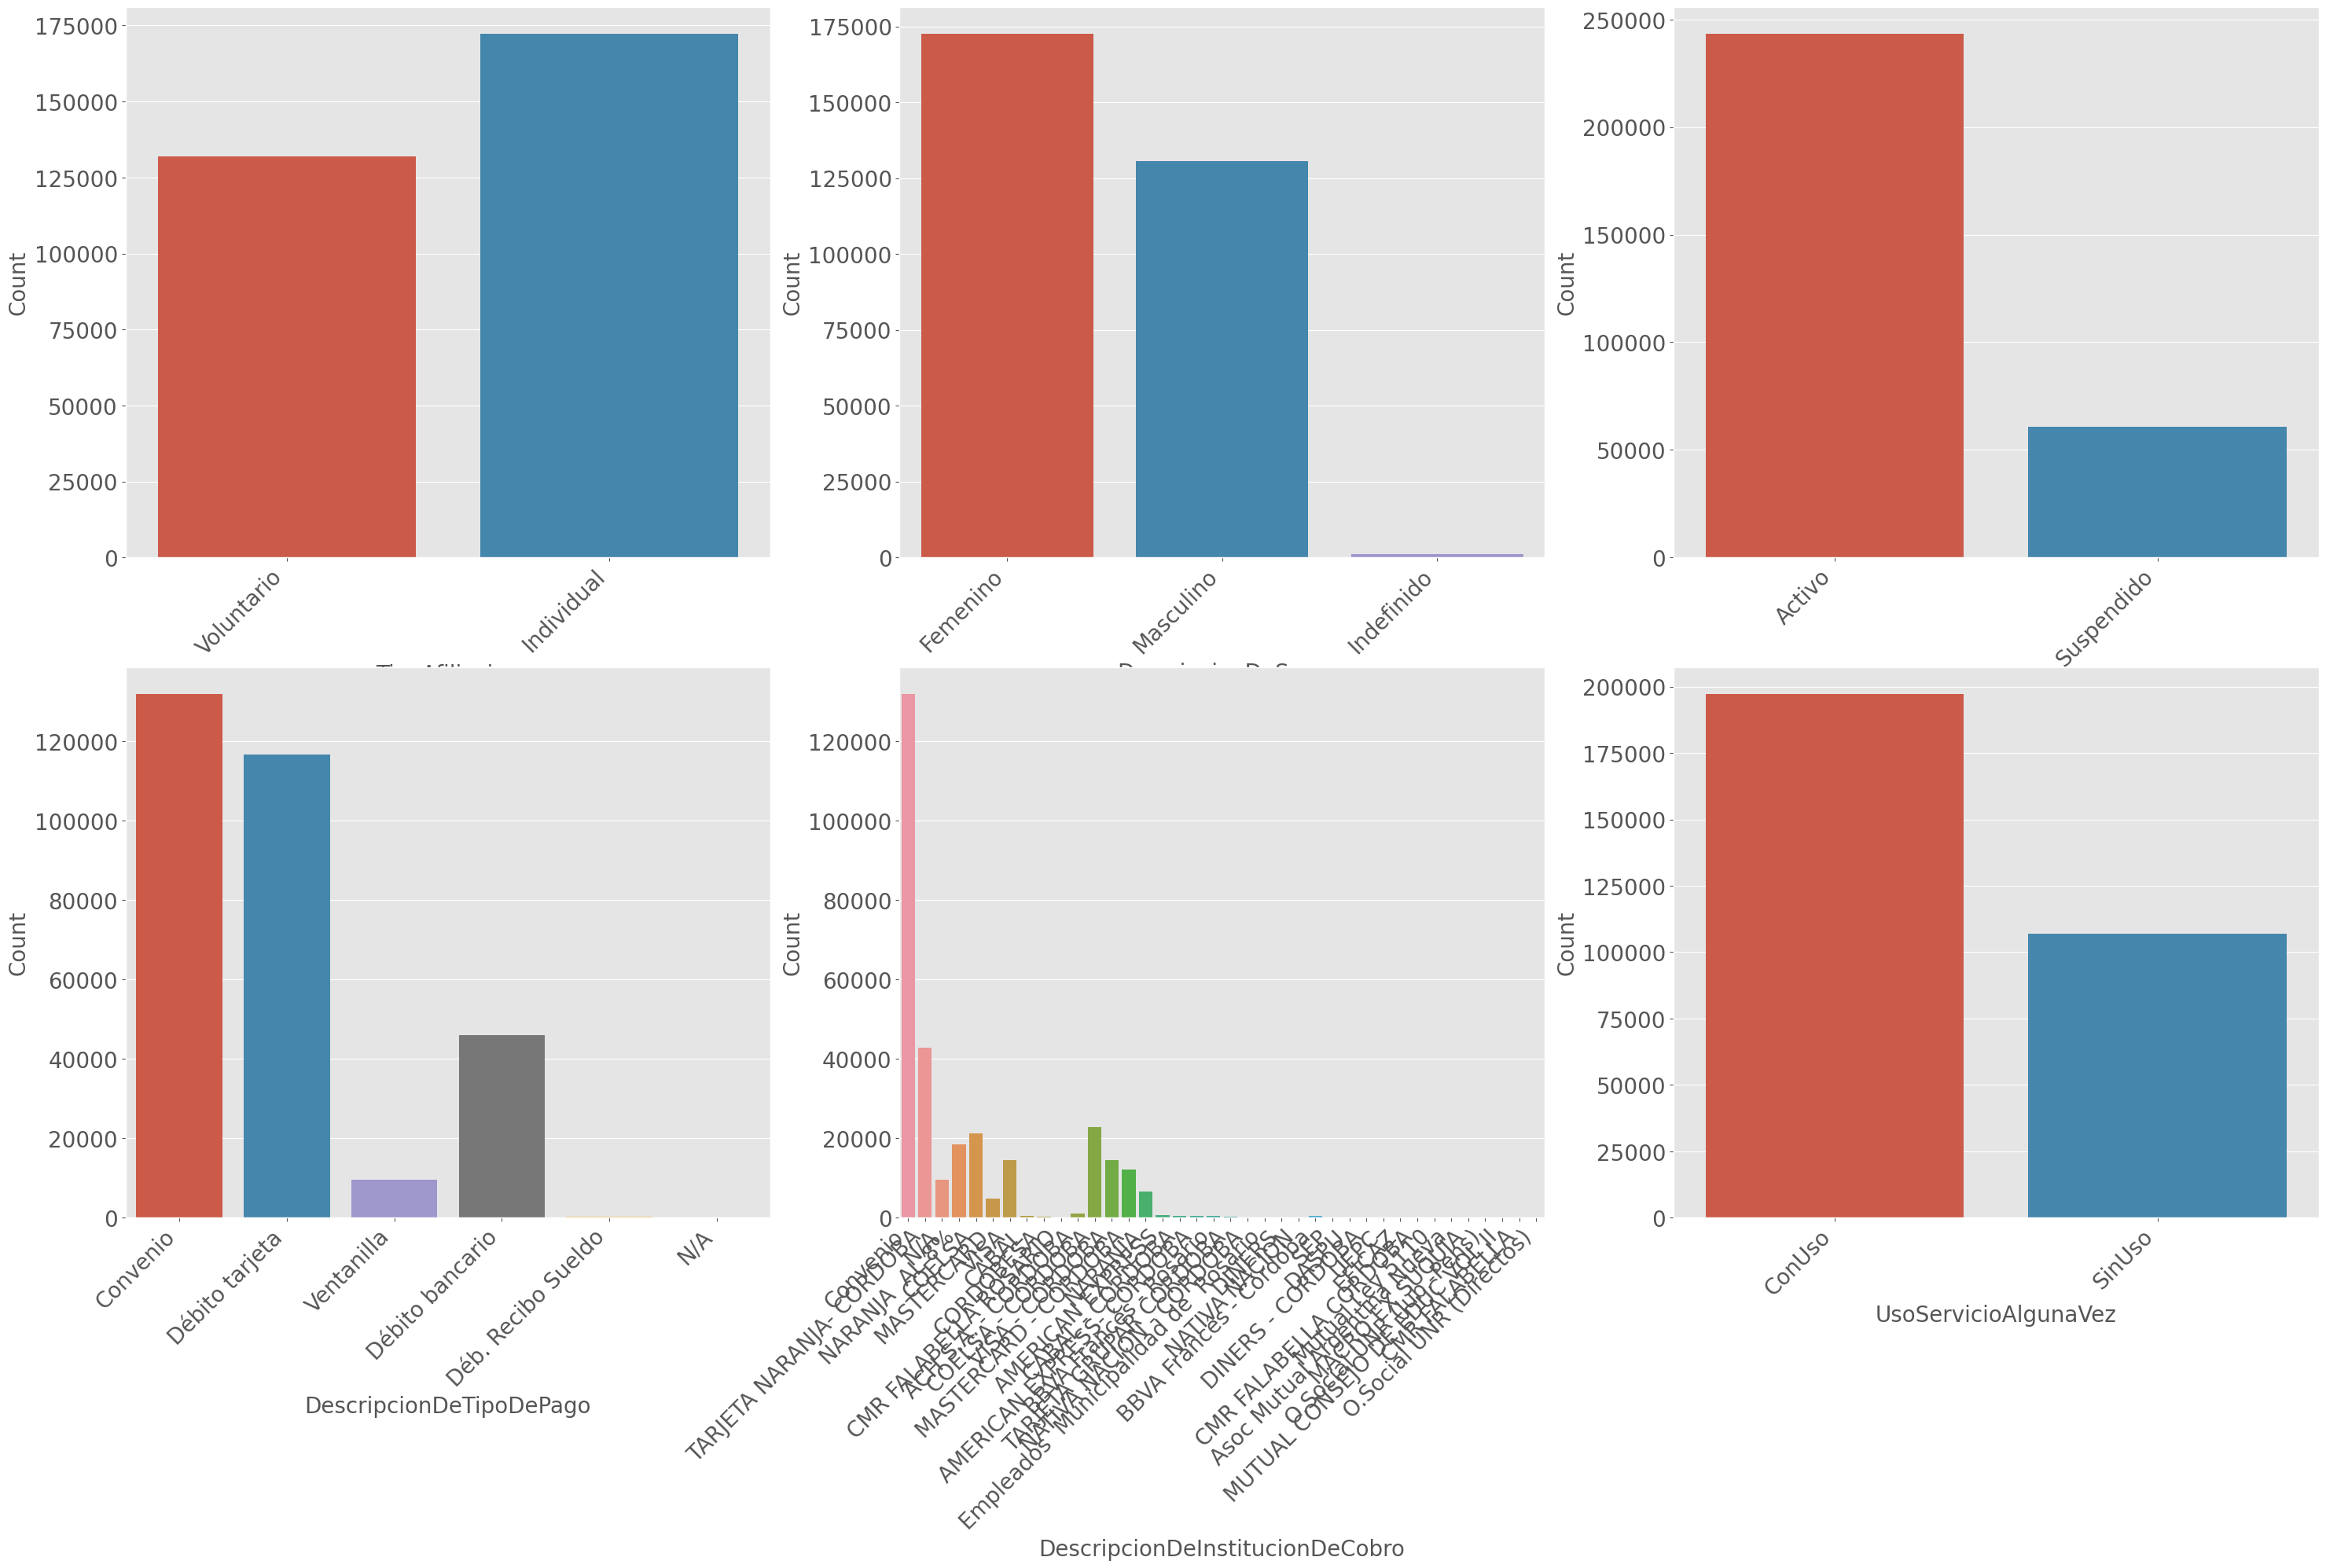

In [184]:
categorical_feature_func(cat_cols[0:6], df, 3)


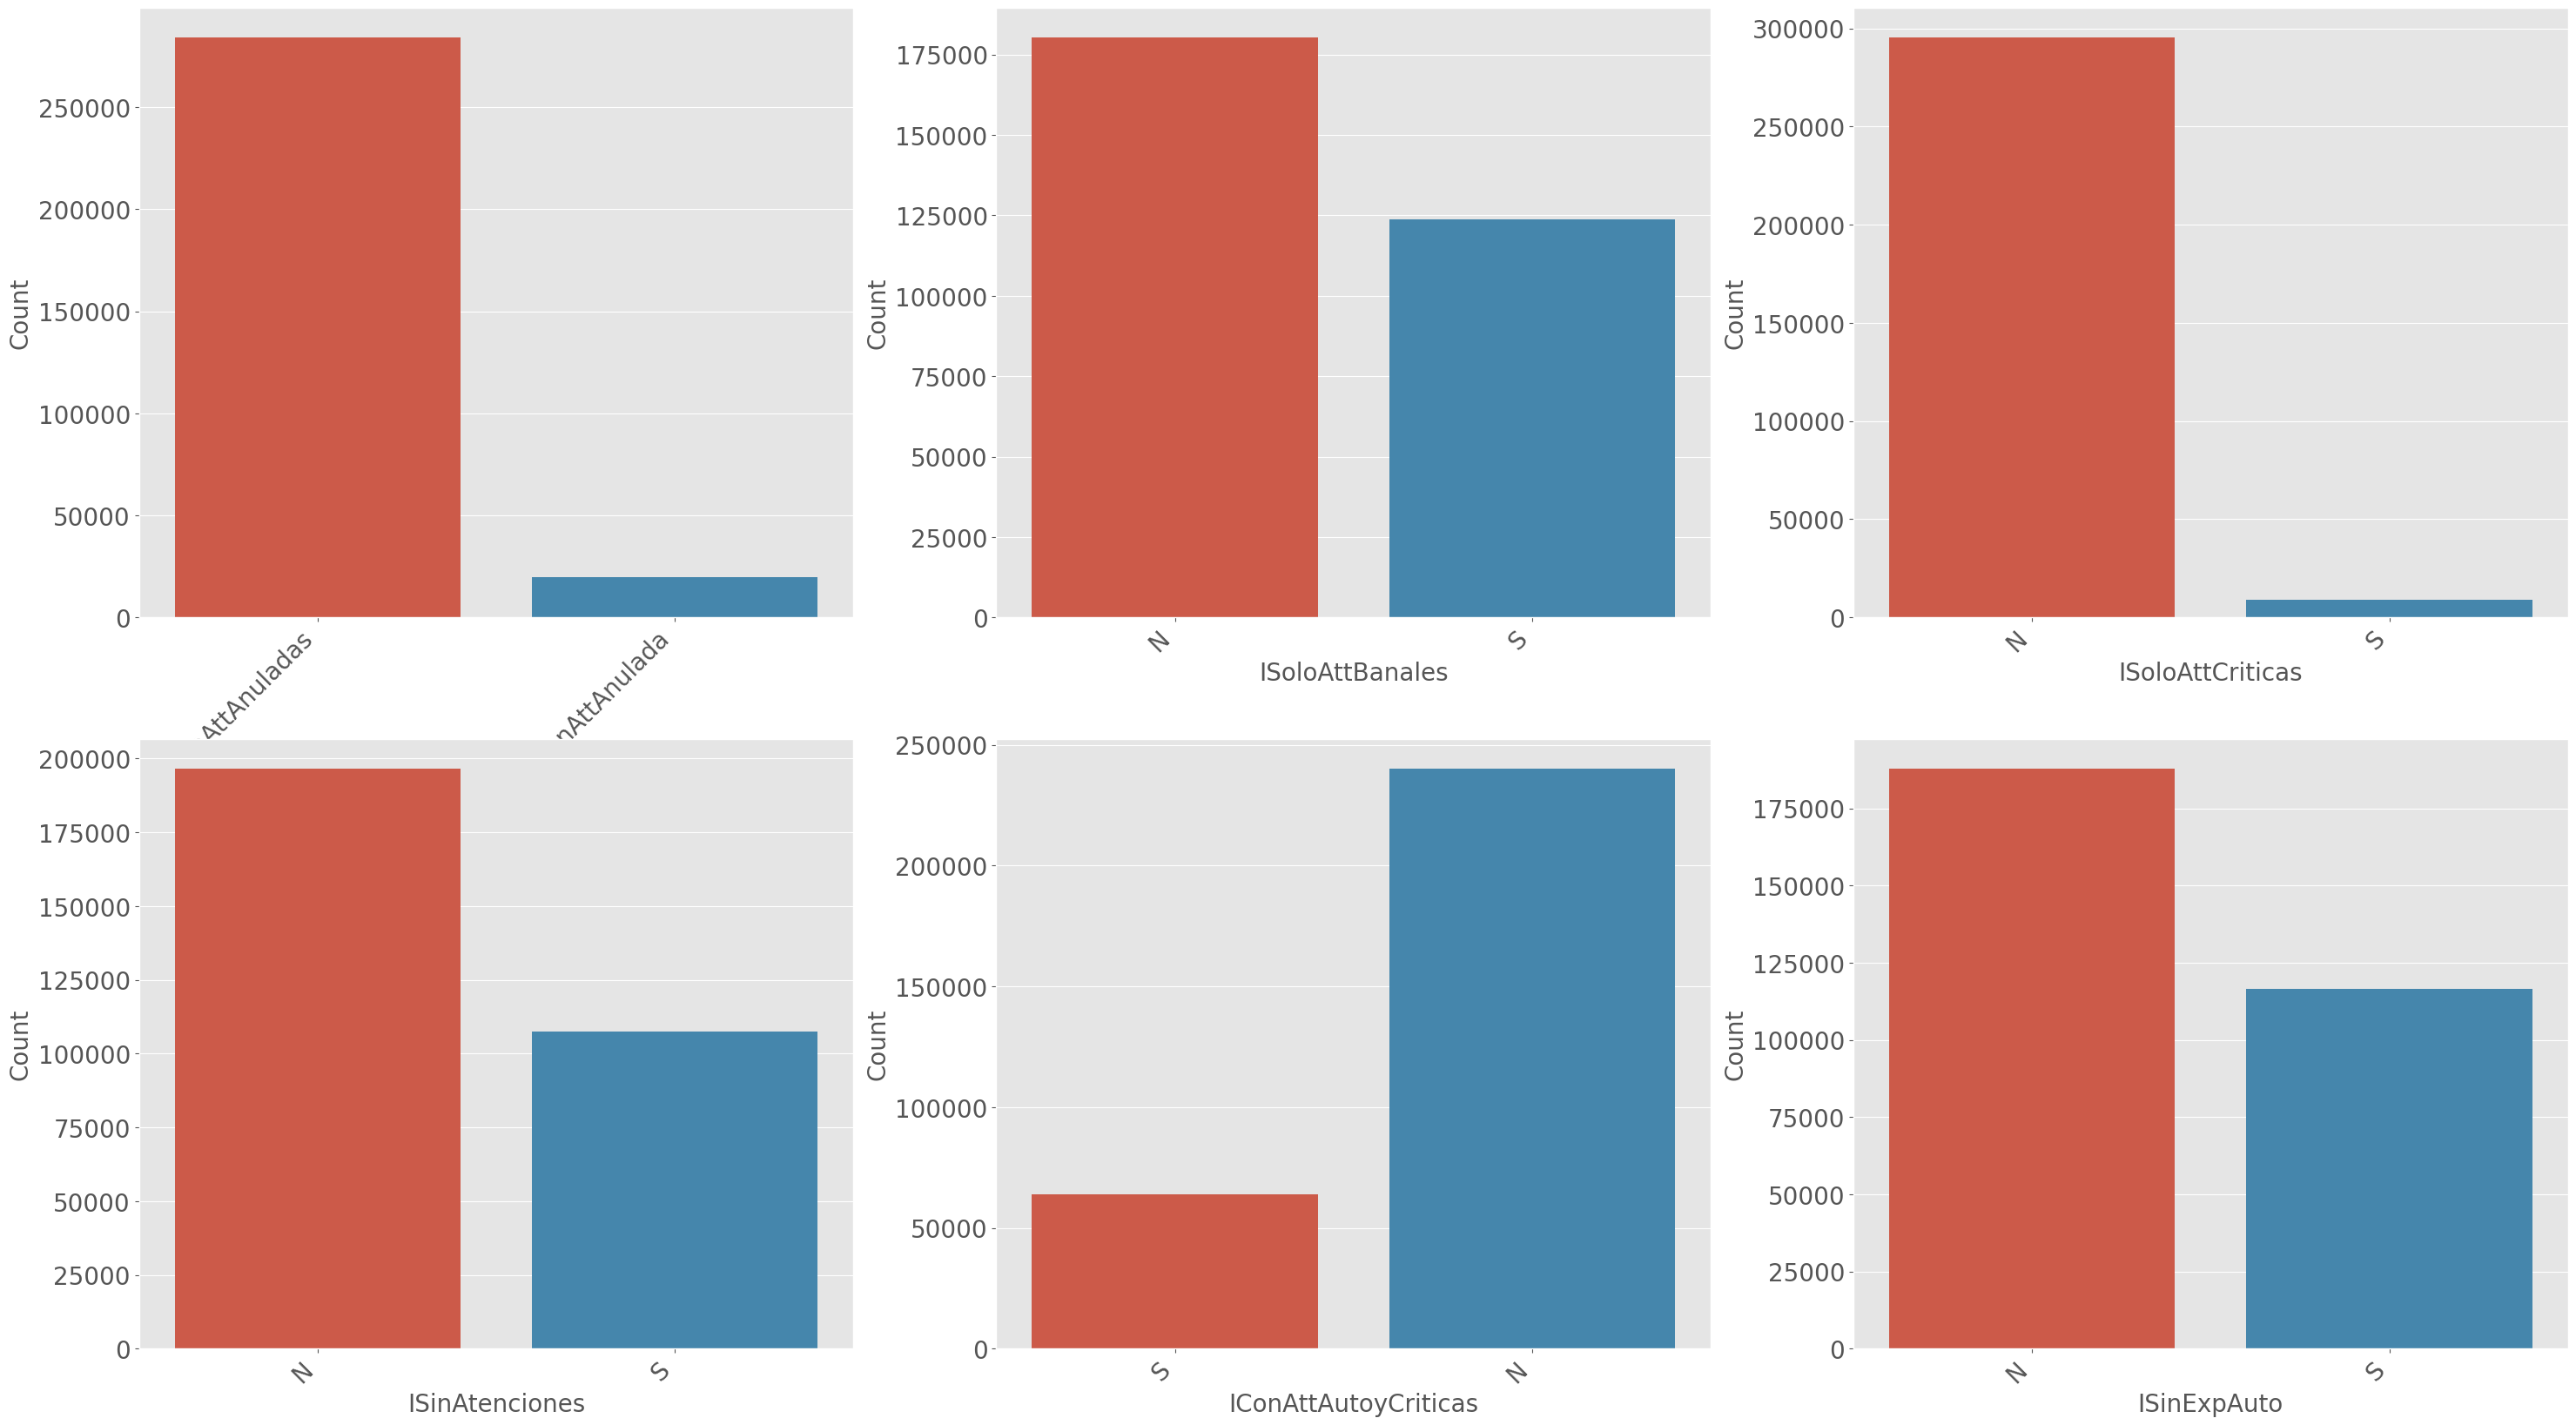

In [185]:
categorical_feature_func(cat_cols[6:12], df, 3)


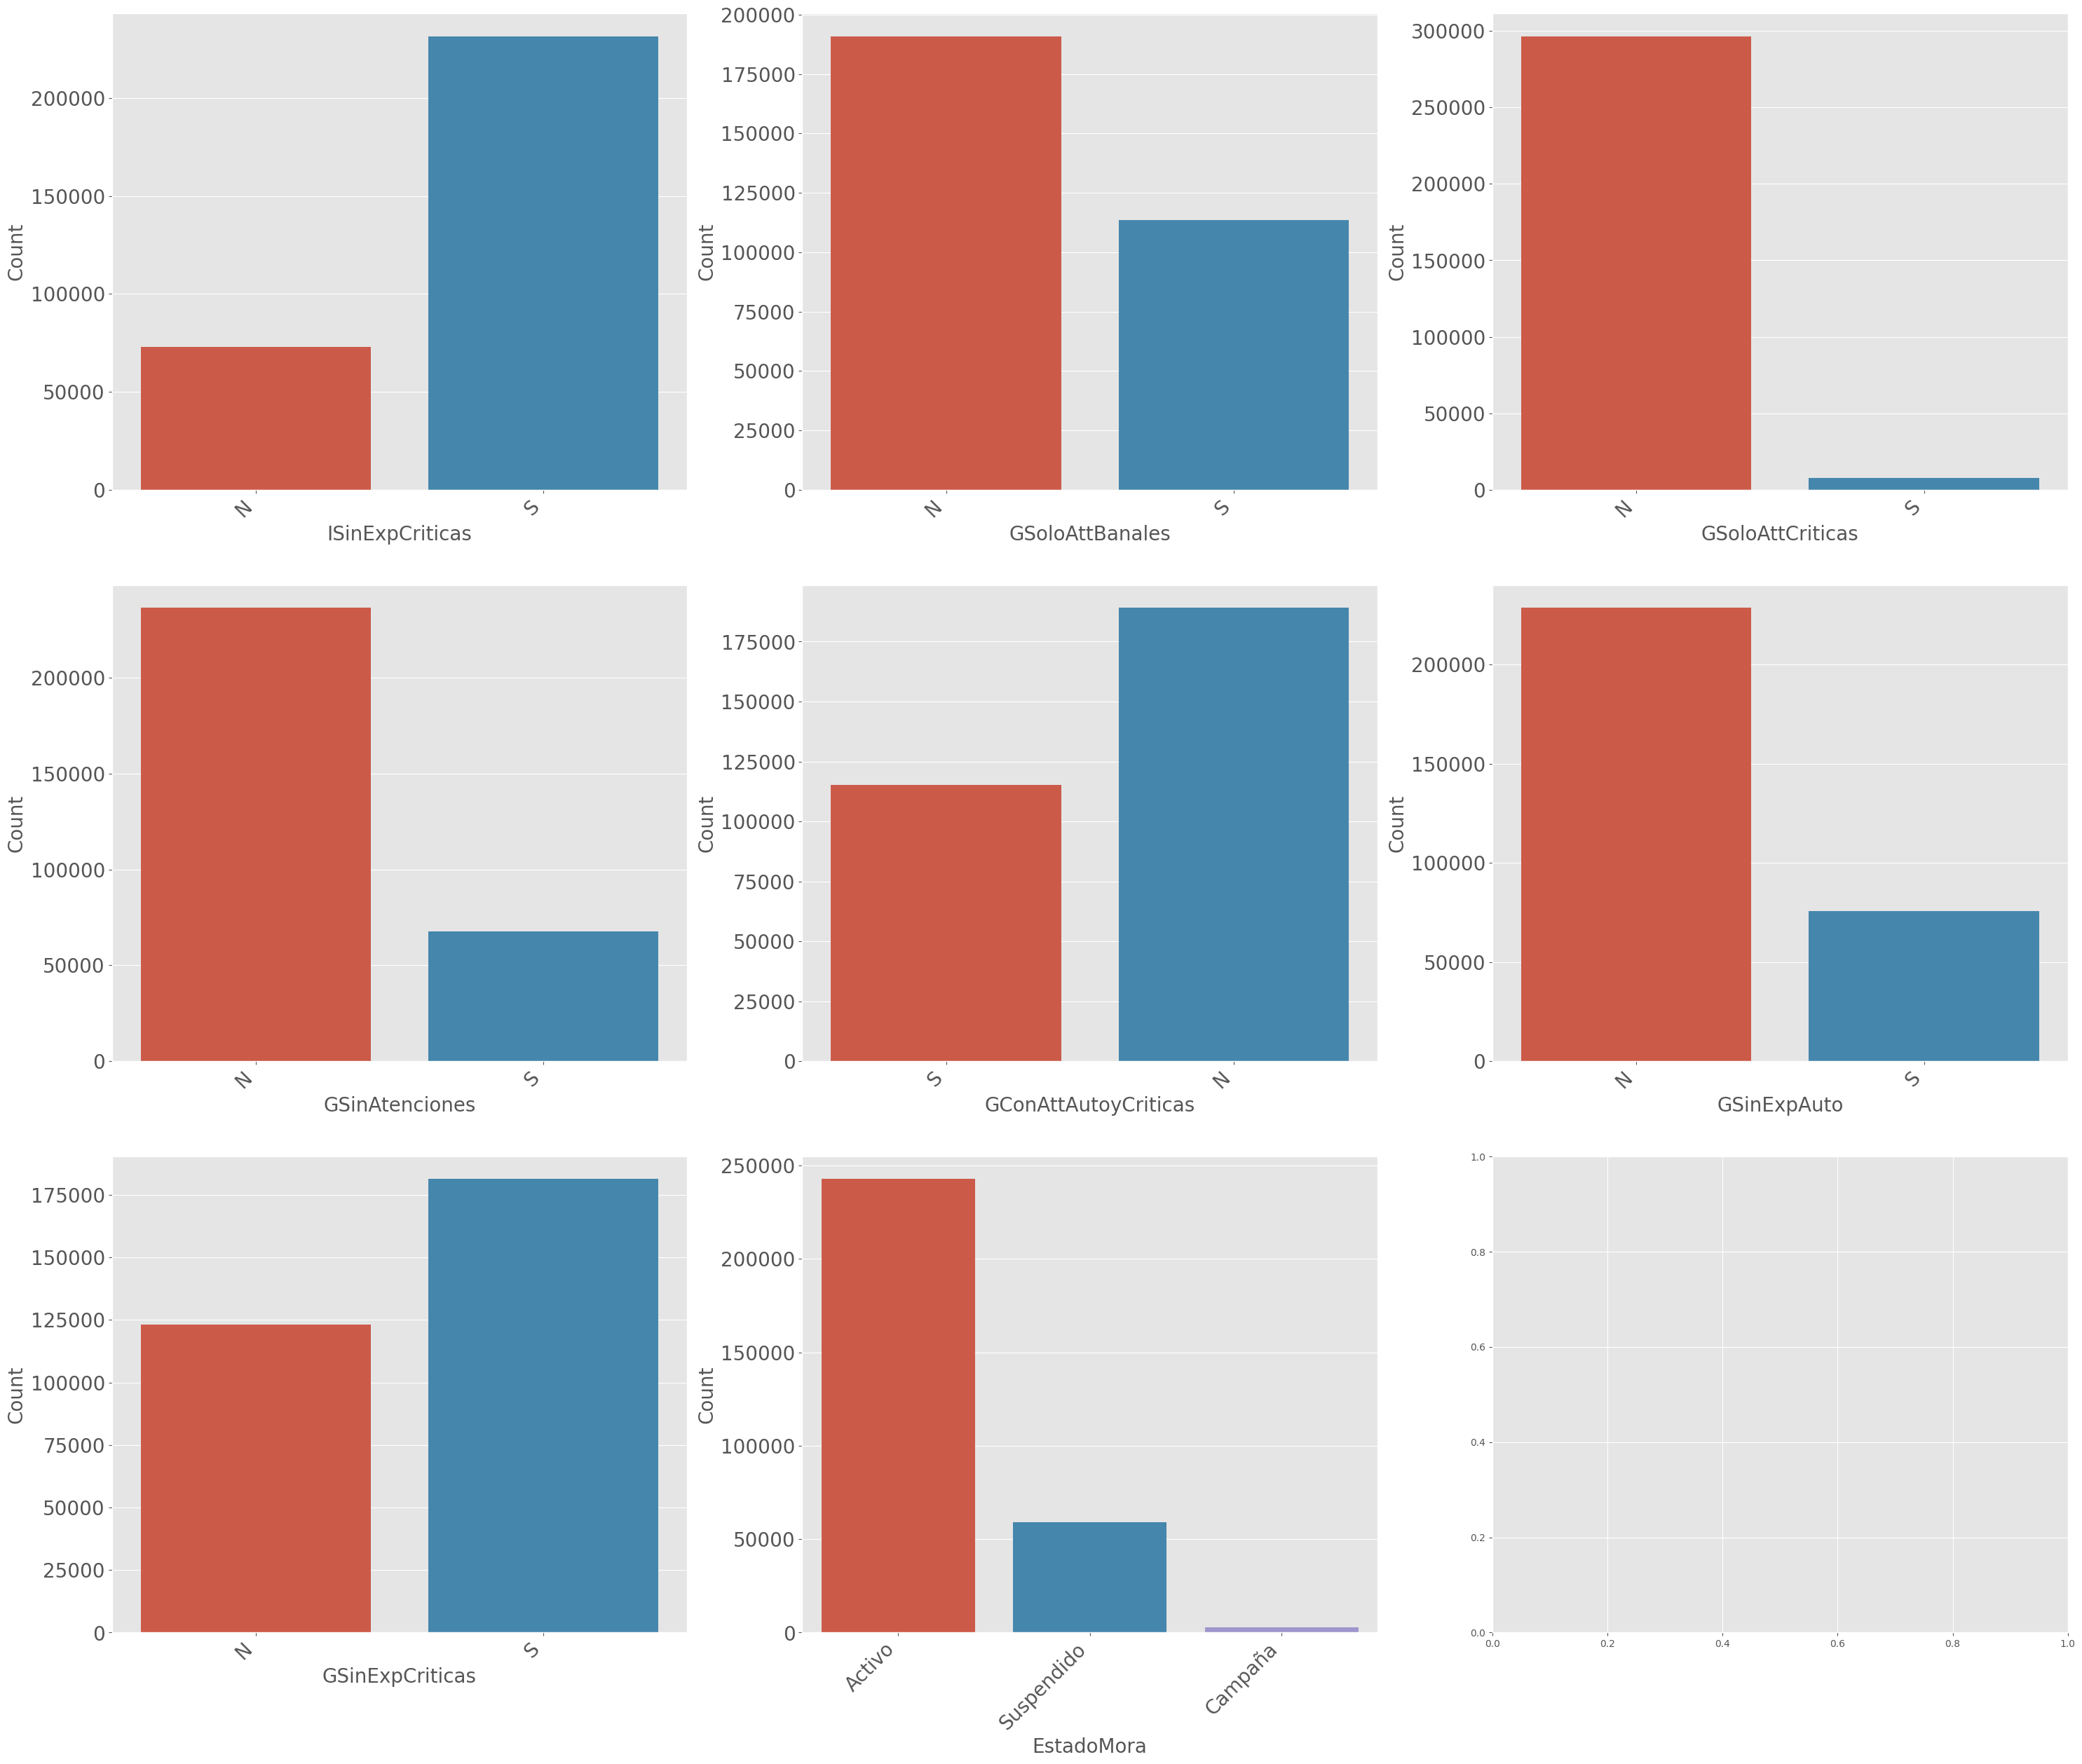

In [186]:
categorical_feature_func(cat_cols[12:], df, 3)


In [187]:
#Visualización bivariada de características categóricas
#relación entre cada variable categórica en el conjunto de datos y la variable objetivo (BajaTarget) de interés.

def categorical_feature_func(cat_cols, cross_col, data, plot_columnas):

    plot_filas = math.ceil(len(cat_cols)/plot_columnas)
    fig, axs = plt.subplots(plot_filas,plot_columnas, figsize=(12*plot_columnas,10*plot_filas))
    
    if plot_filas==1:
        for index, col in enumerate(cat_cols):
            pd.crosstab(data[col],data[cross_col]).plot(kind="bar", rot=45, ax = axs[index])
            ax=axs[index]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(col, fontsize=20)  
            ax.set_ylabel('Count', fontsize=20)
    else:
        for index, col in enumerate(cat_cols):
            axs_fila = index // plot_columnas
            axs_col = index % plot_columnas
            pd.crosstab(data[col],data[cross_col]).plot( kind="bar", rot=45, ax = axs[axs_fila][axs_col])
            #sns.countplot( x=col,hue=cross_col, data=data, ax = axs[axs_fila][axs_col])
            ax=axs[axs_fila][axs_col]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(col, fontsize=20)  
            ax.set_ylabel('Count', fontsize=20)
           


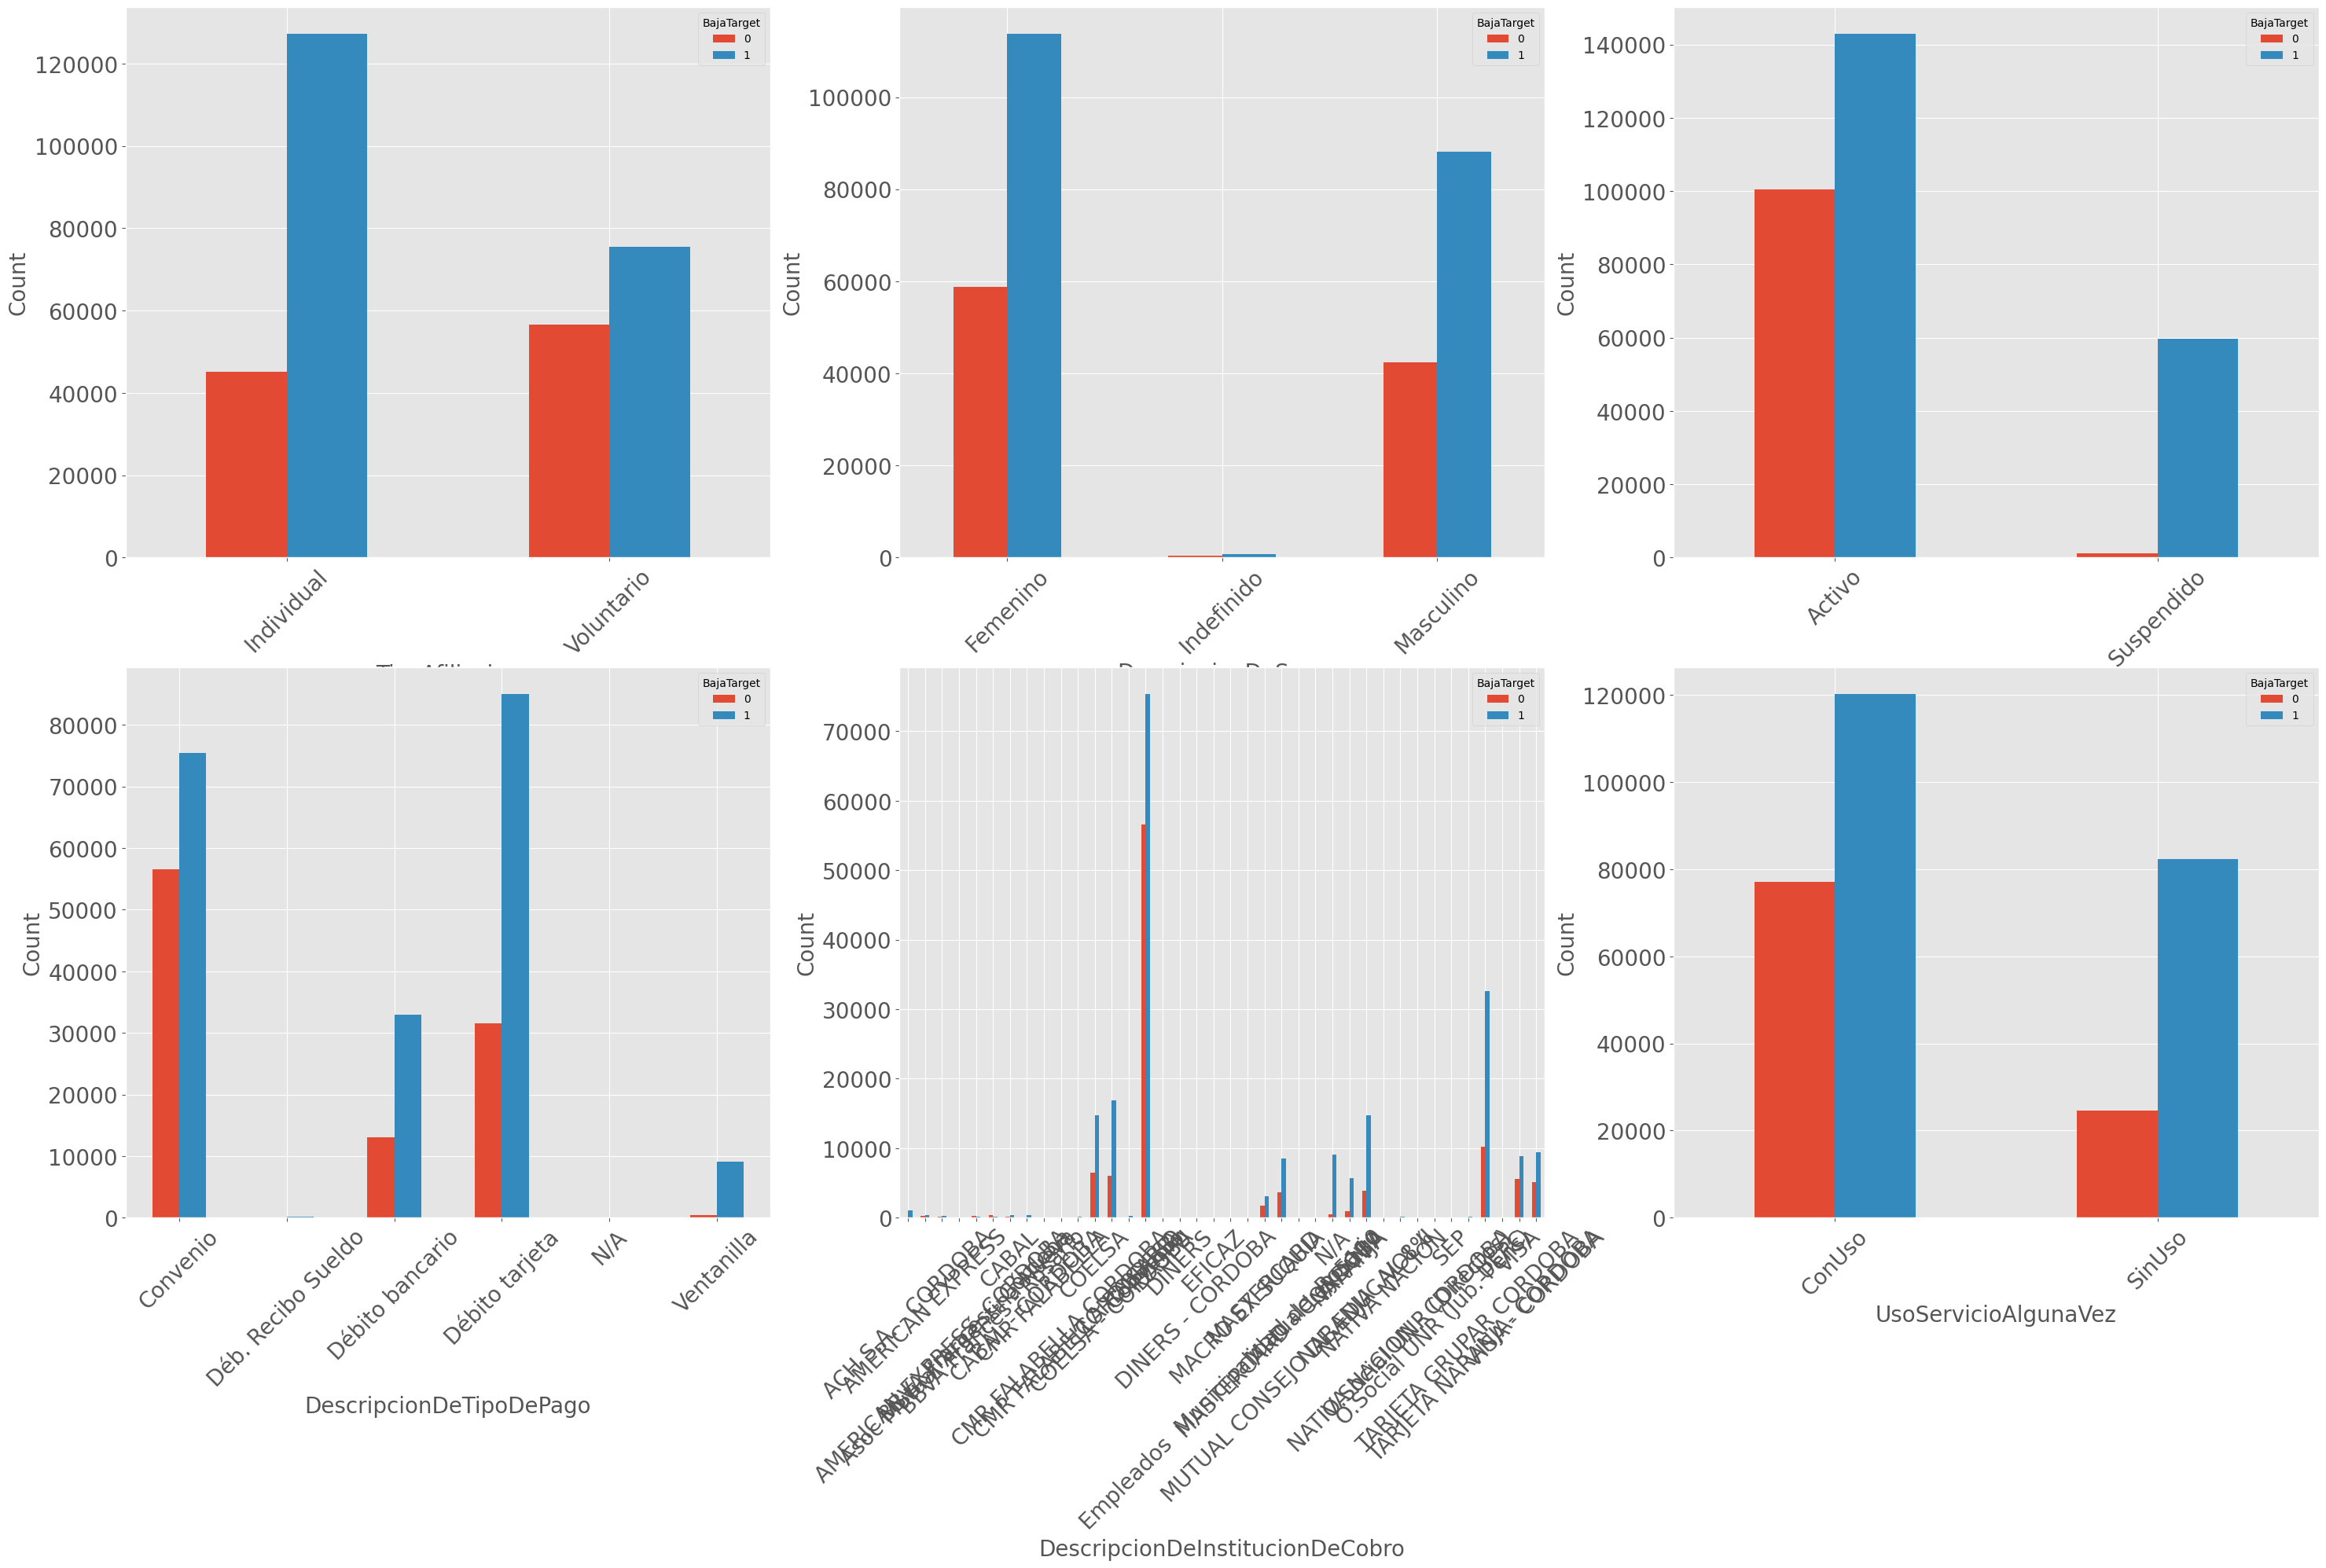

In [188]:
categorical_feature_func(cat_cols[0:6], 'BajaTarget', df, 3)

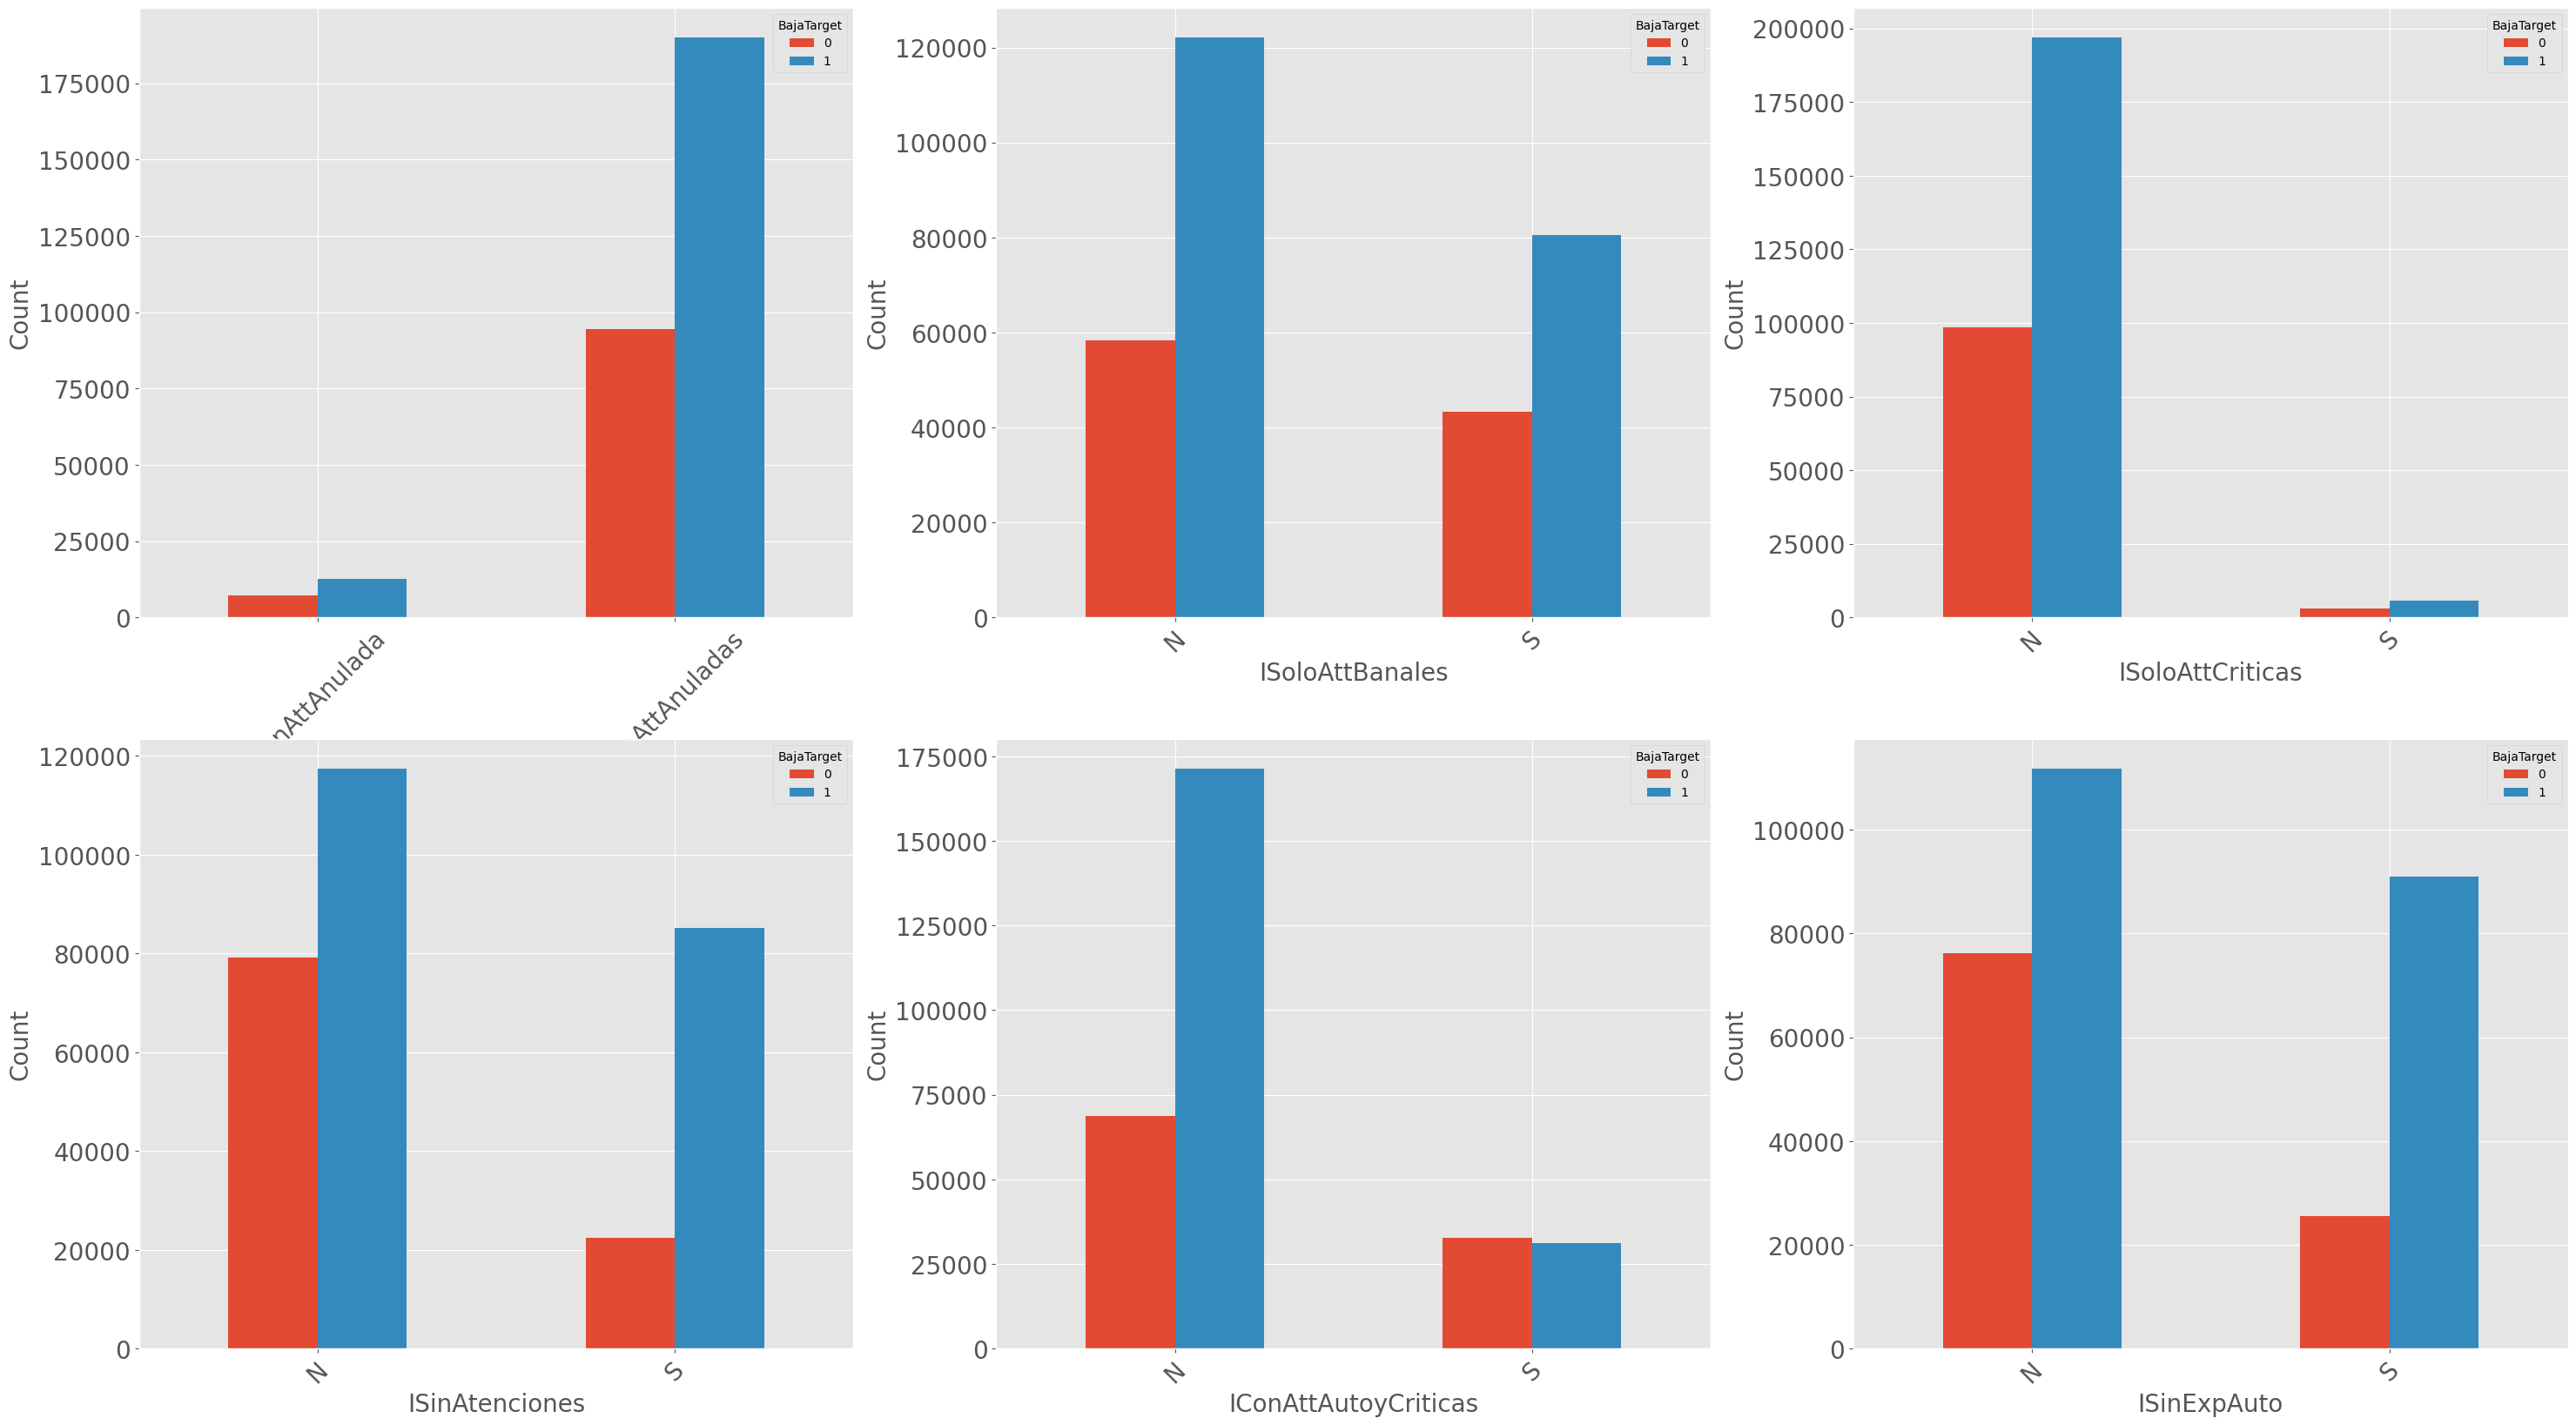

In [189]:
categorical_feature_func(cat_cols[6:12], 'BajaTarget', df, 3)

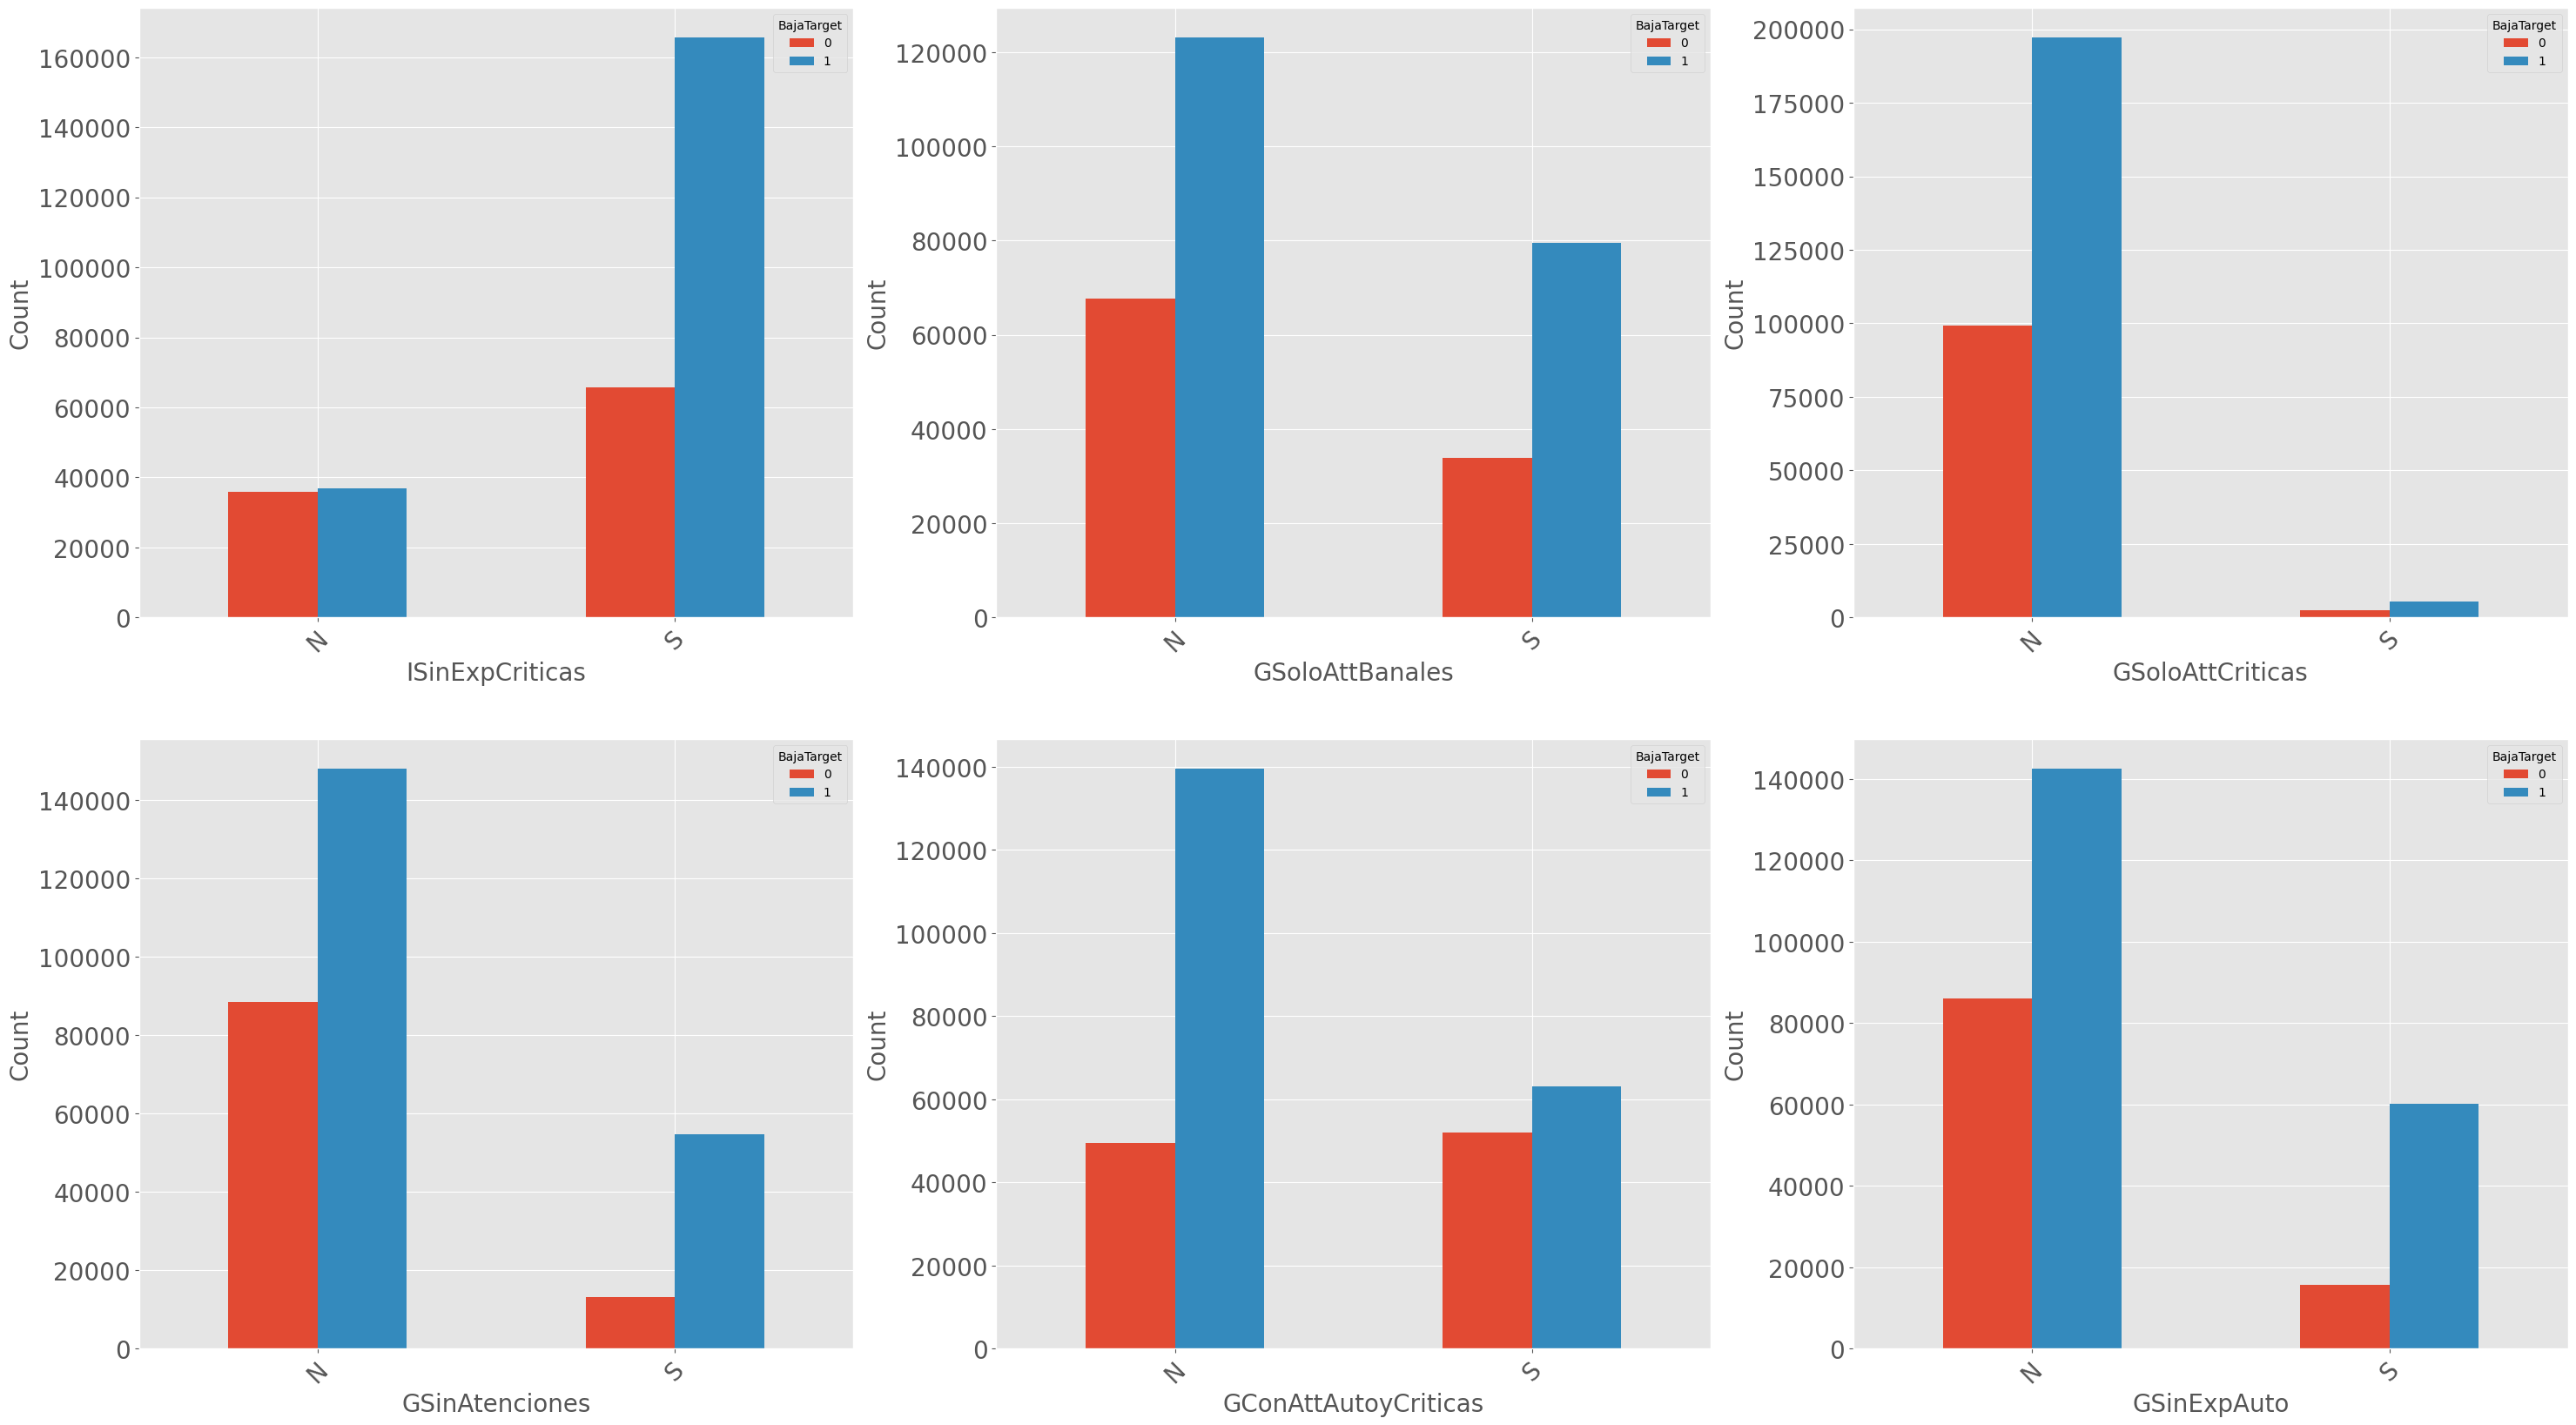

In [190]:
categorical_feature_func(cat_cols[12:18], 'BajaTarget', df, 3)

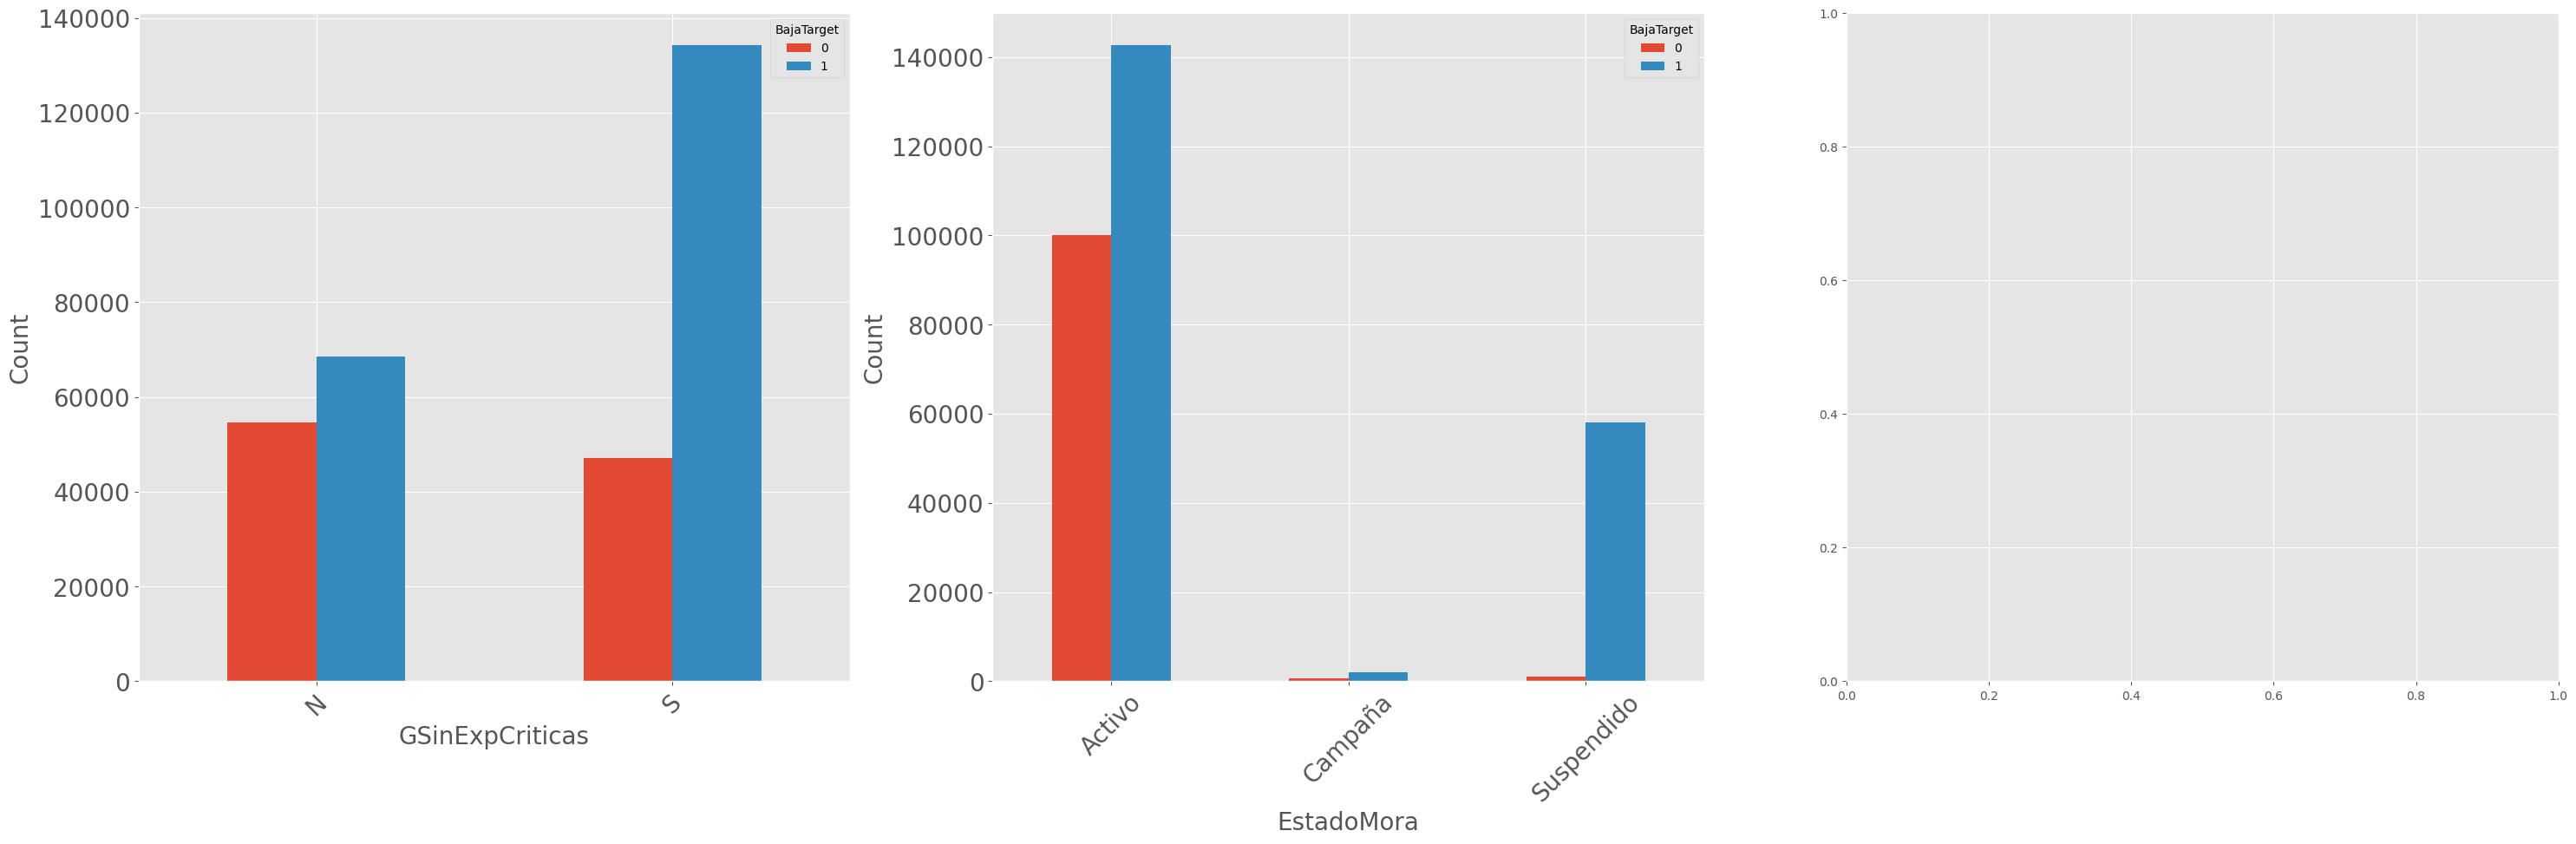

In [191]:
categorical_feature_func(cat_cols[18:], 'BajaTarget', df, 3)

In [192]:
# Univariate visualization of numerical features
def numeric_features_func(num_cols, data, plot_columnas):

    plot_filas = math.ceil(len(num_cols)/plot_columnas)
    fig, axs = plt.subplots(plot_filas,plot_columnas, figsize=(10*plot_columnas,10*plot_filas))
    
    if plot_filas==1:
        for index, col in enumerate(num_cols):
            sns.histplot(x=col,data=data, kde=True, ax = axs[index])
            ax=axs[index]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(col, fontsize=20)  
            ax.set_ylabel('Count', fontsize=20)
    else:
        for index, col in enumerate(num_cols):
            axs_fila = index // plot_columnas
            axs_col = index % plot_columnas
            sns.histplot(x=col,data=data, ax = axs[axs_fila][axs_col])
            ax=axs[axs_fila][axs_col]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(col, fontsize=20)  
            ax.set_ylabel('Count', fontsize=20)
    plt.tight_layout()
    

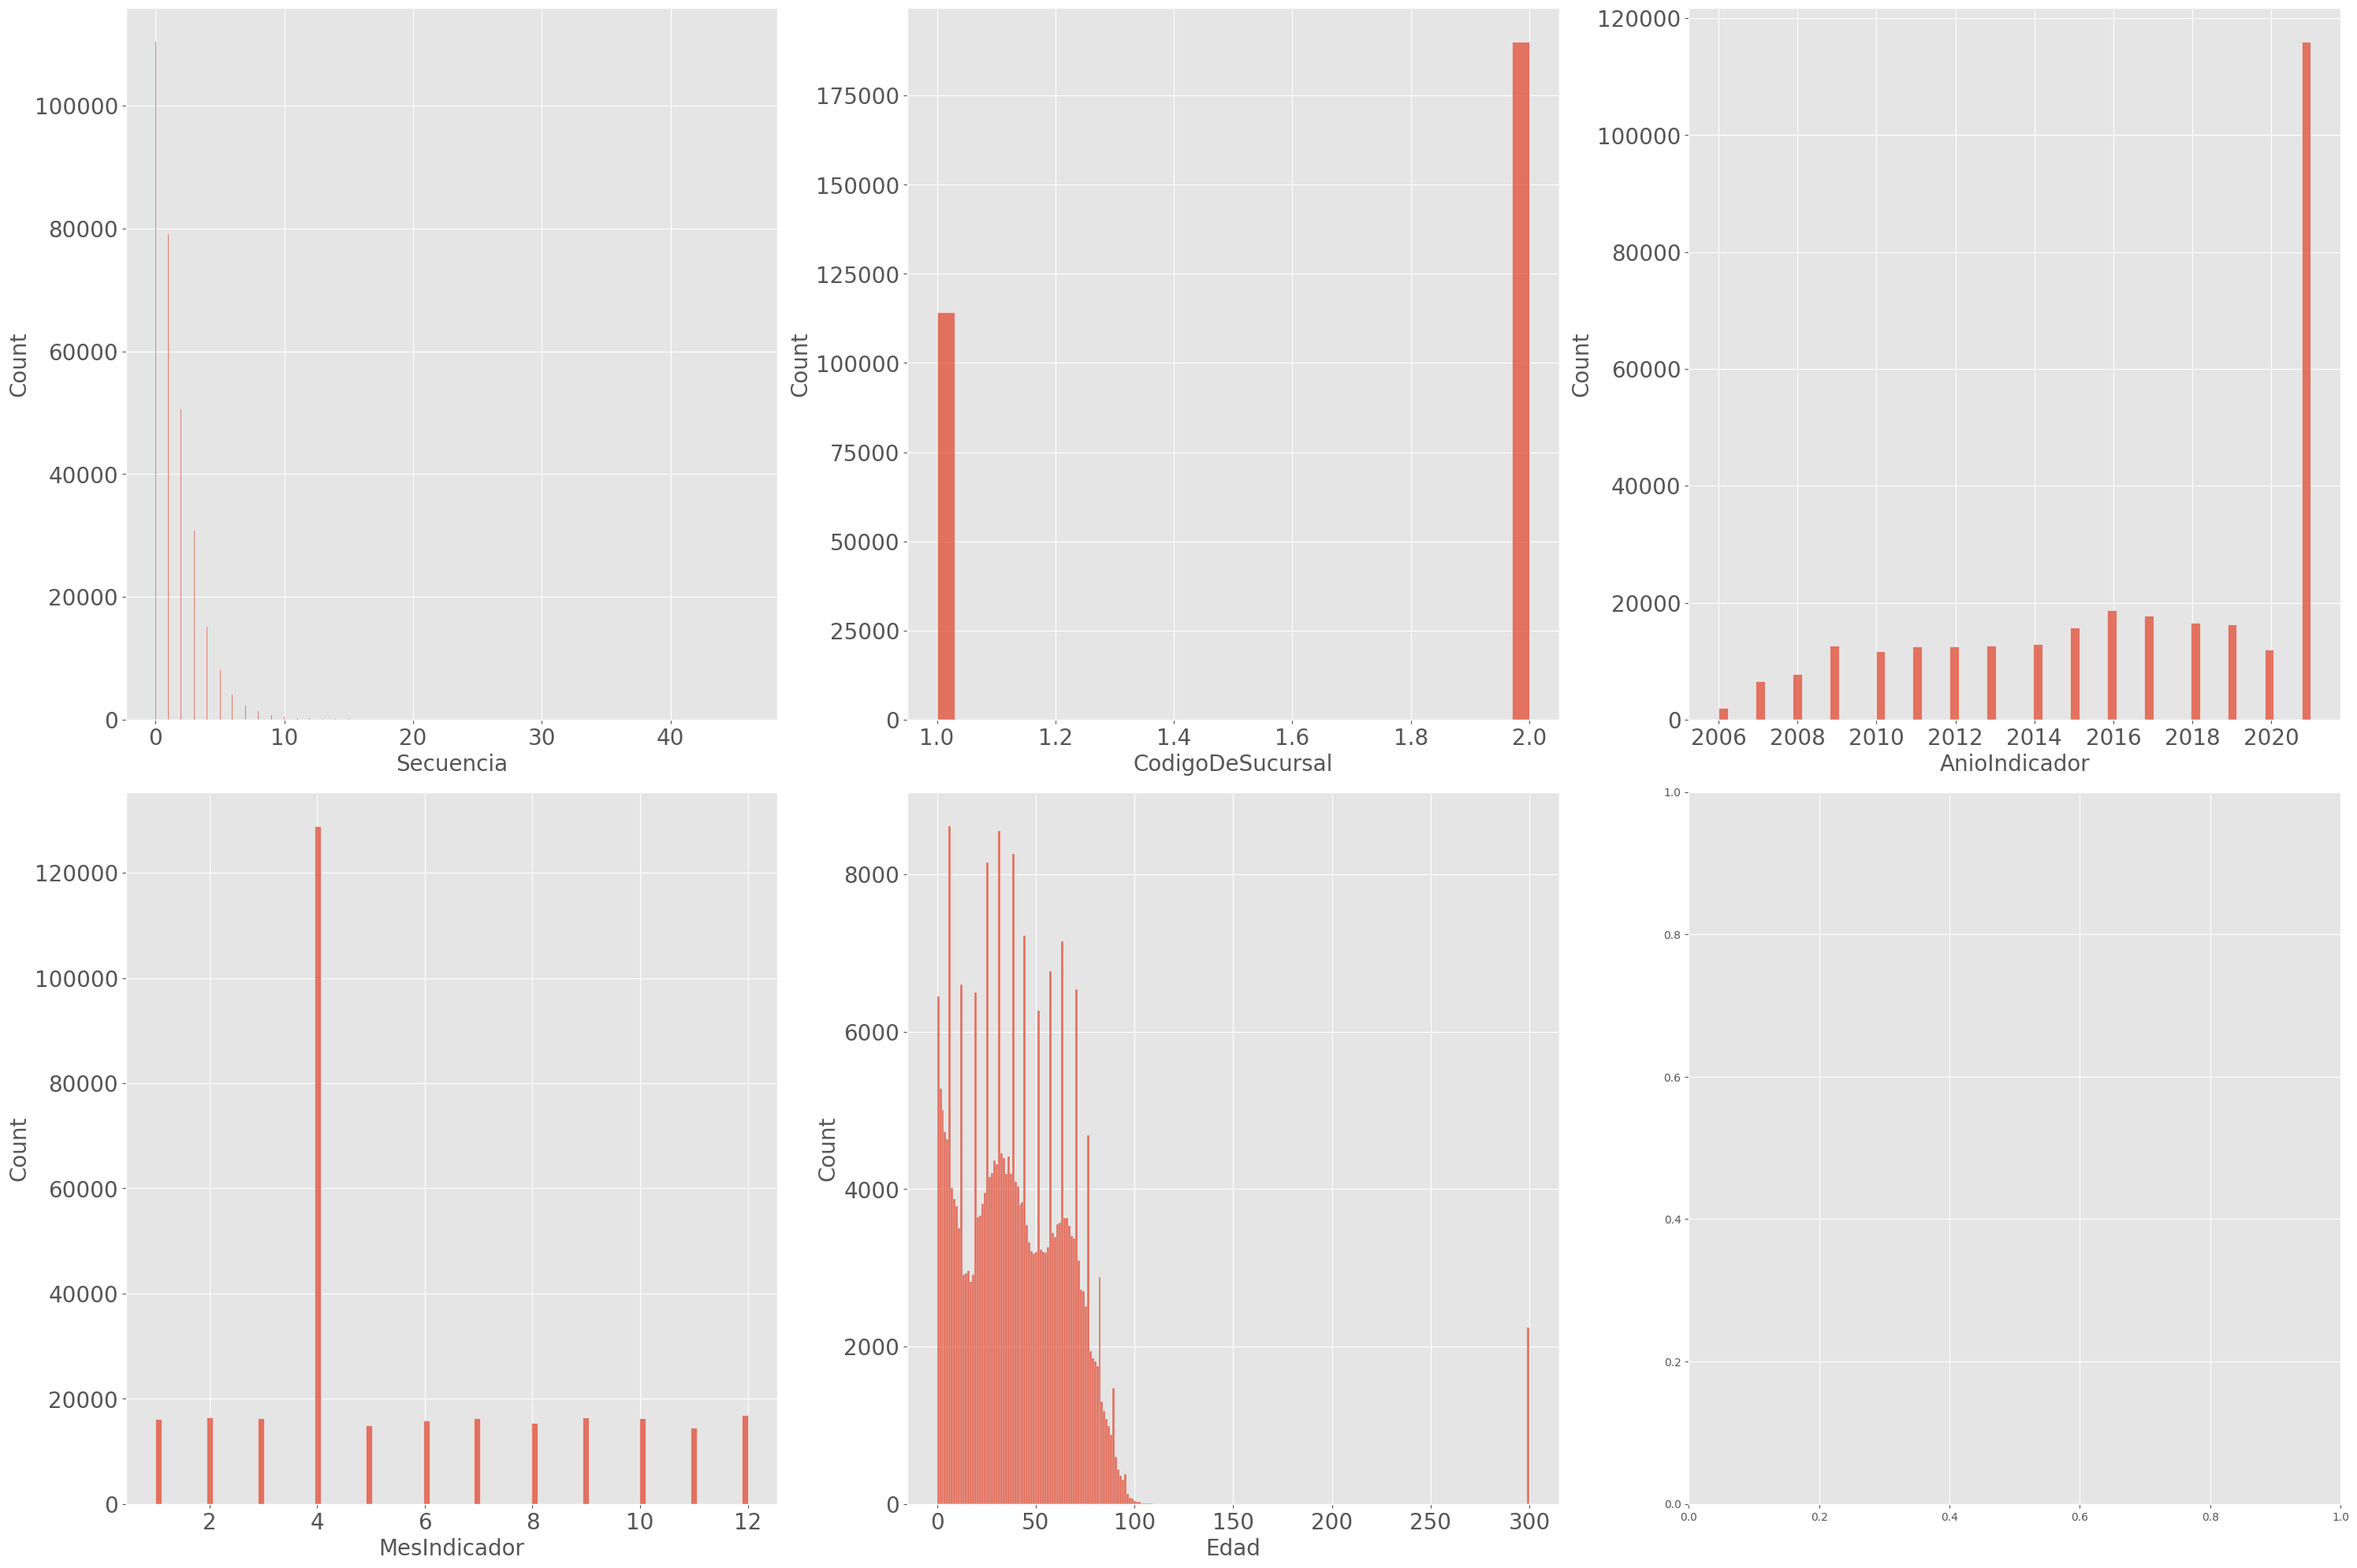

In [193]:
numeric_features_func(num_cols[0:5], df, 3)

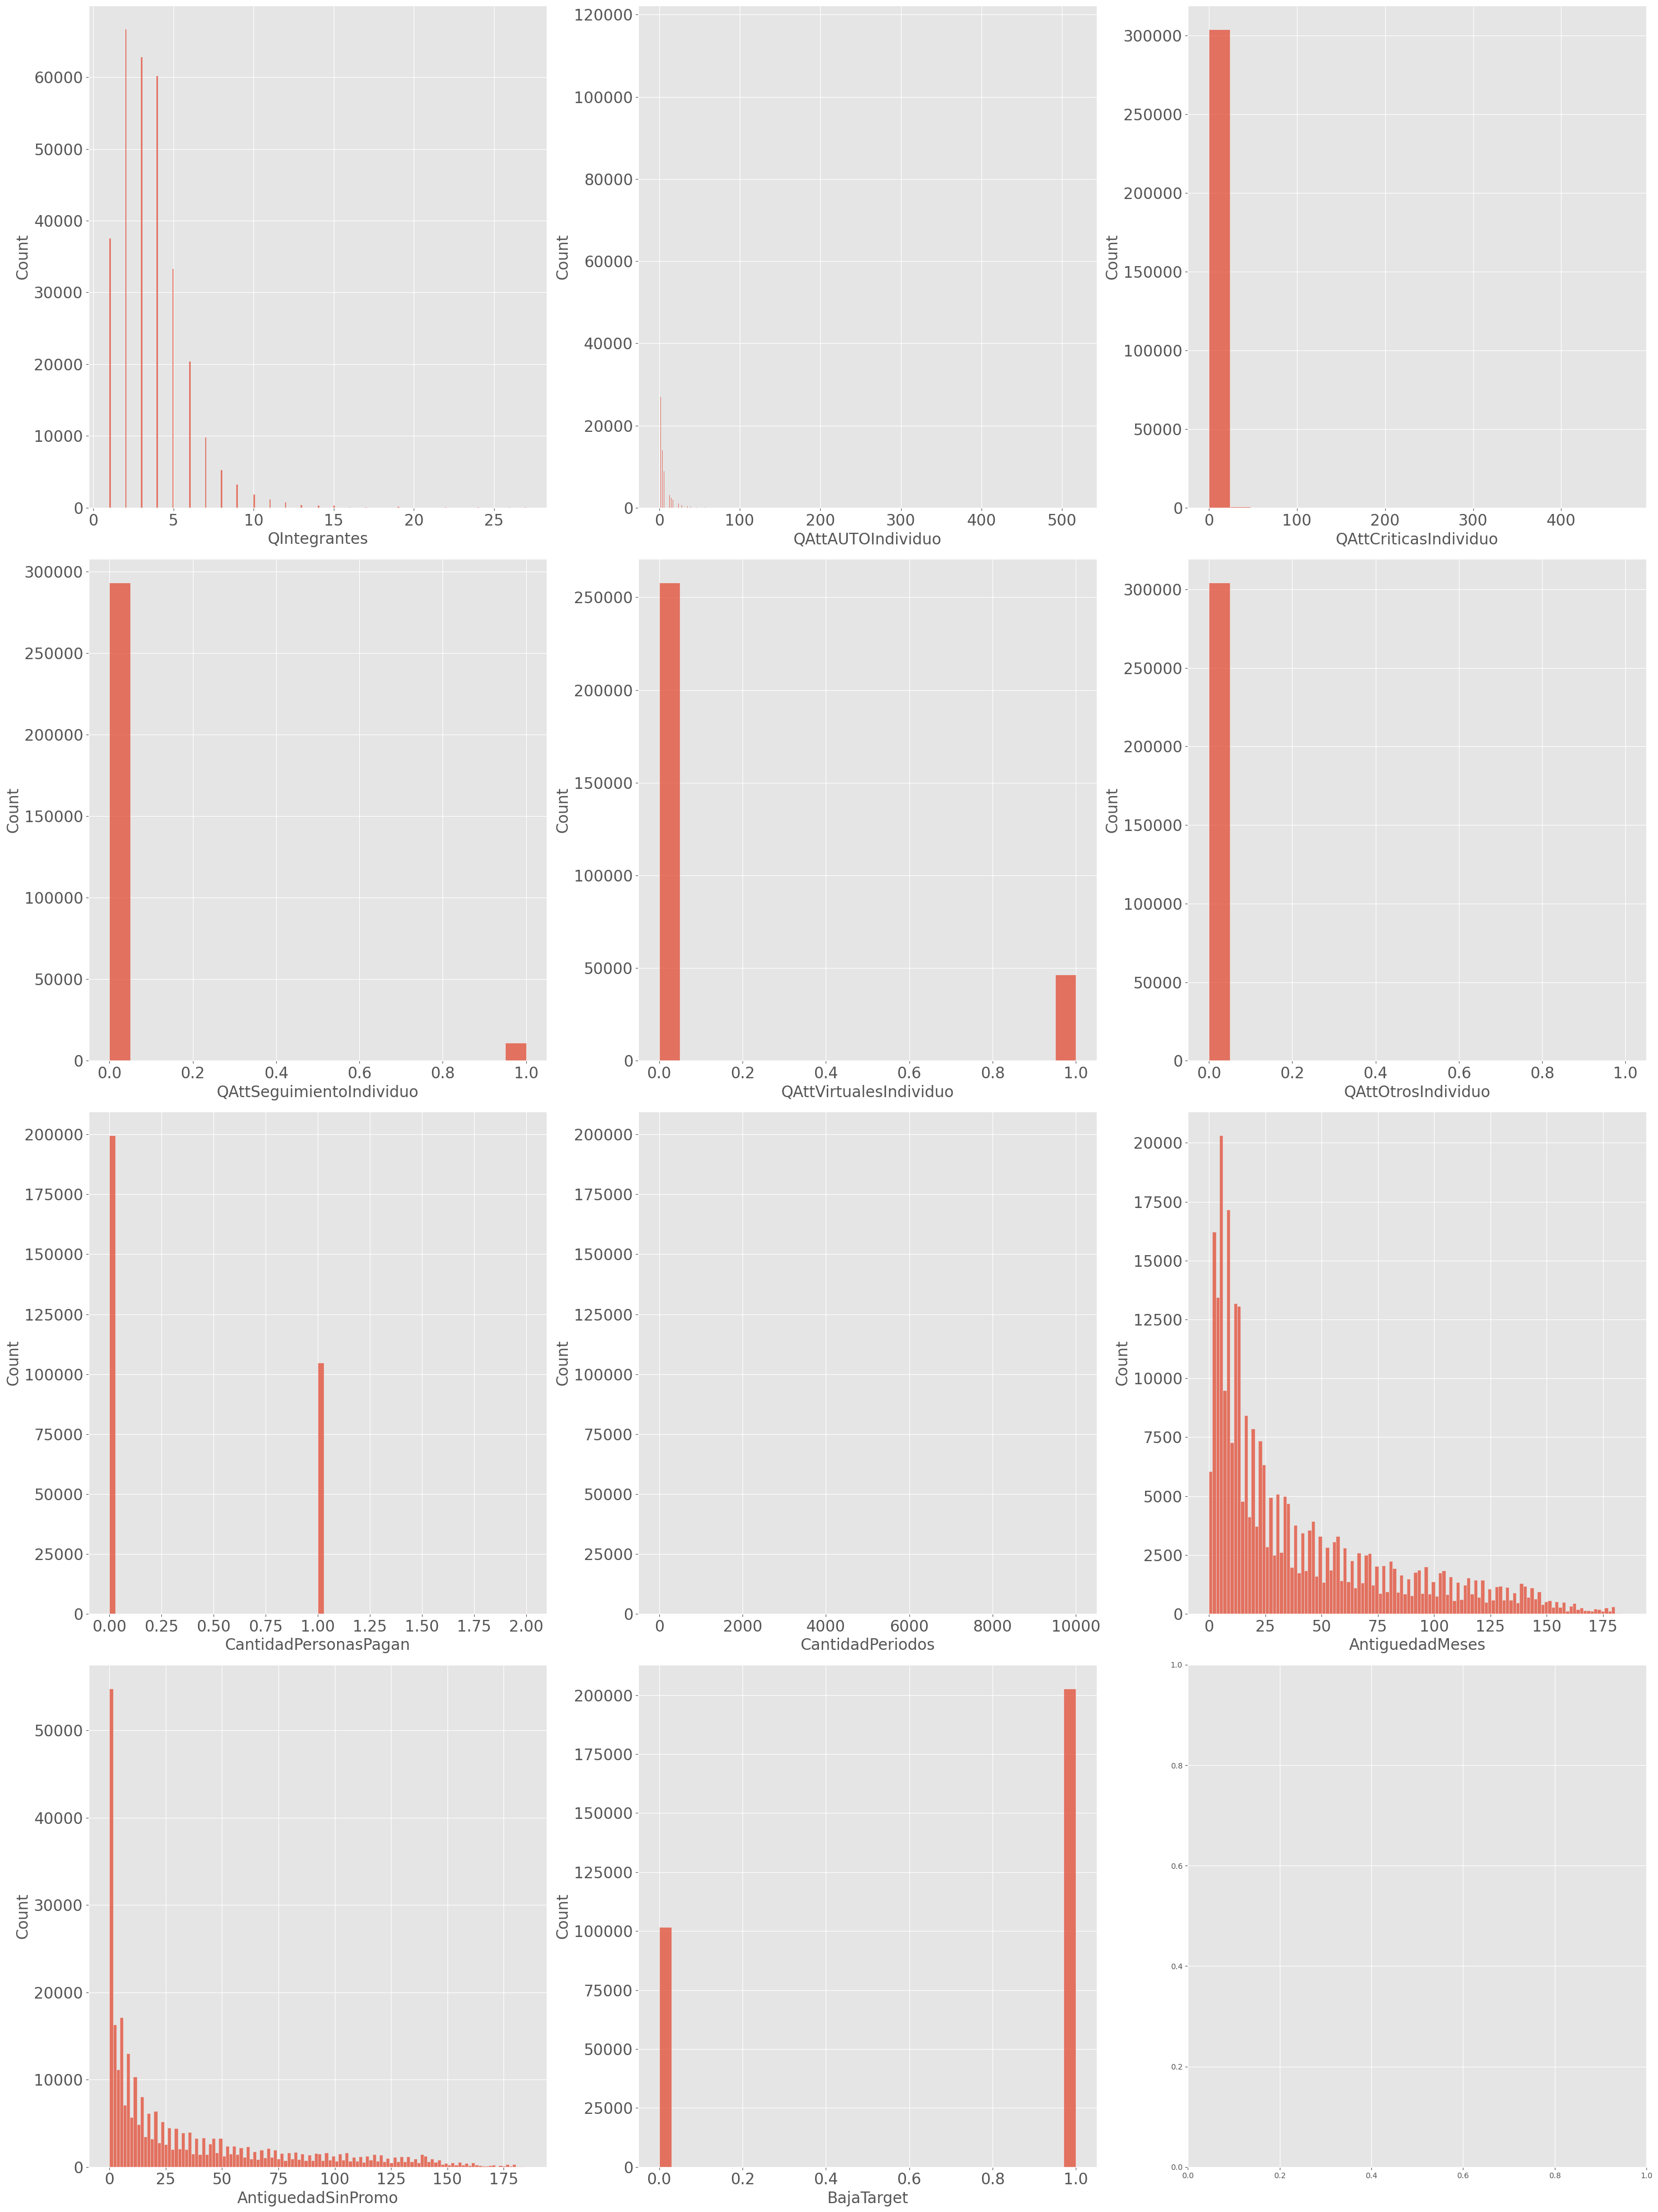

In [194]:
numeric_features_func(num_cols[5:], df, 3)

In [195]:
#Visualización bivariada de características numéricas
#relación entre cada variable numérica en el conjunto de datos y la variable objetivo (BajaTarget) de interés.

def numeric_features_func(num_cols, x_col, data, plot_columnas):

    plot_filas = math.ceil(len(num_cols)/plot_columnas)
    fig, axs = plt.subplots(plot_filas,plot_columnas, figsize=(10*plot_columnas,10*plot_filas))
    
    if plot_filas==1:
        for index, col in enumerate(num_cols):
            sns.boxplot(palette='Blues', x=x_col, y=col, data=data, ax = axs[index])
            ax=axs[index]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(x_col, fontsize=20)  
            ax.set_ylabel(col, fontsize=20)
    else:
        for index, col in enumerate(num_cols):
            axs_fila = index // plot_columnas
            axs_col = index % plot_columnas
            sns.boxplot(palette='Blues', x=x_col, y=col, data=data, ax = axs[axs_fila][axs_col])
            ax=axs[axs_fila][axs_col]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(x_col, fontsize=20)  
            ax.set_ylabel(col, fontsize=20)
    



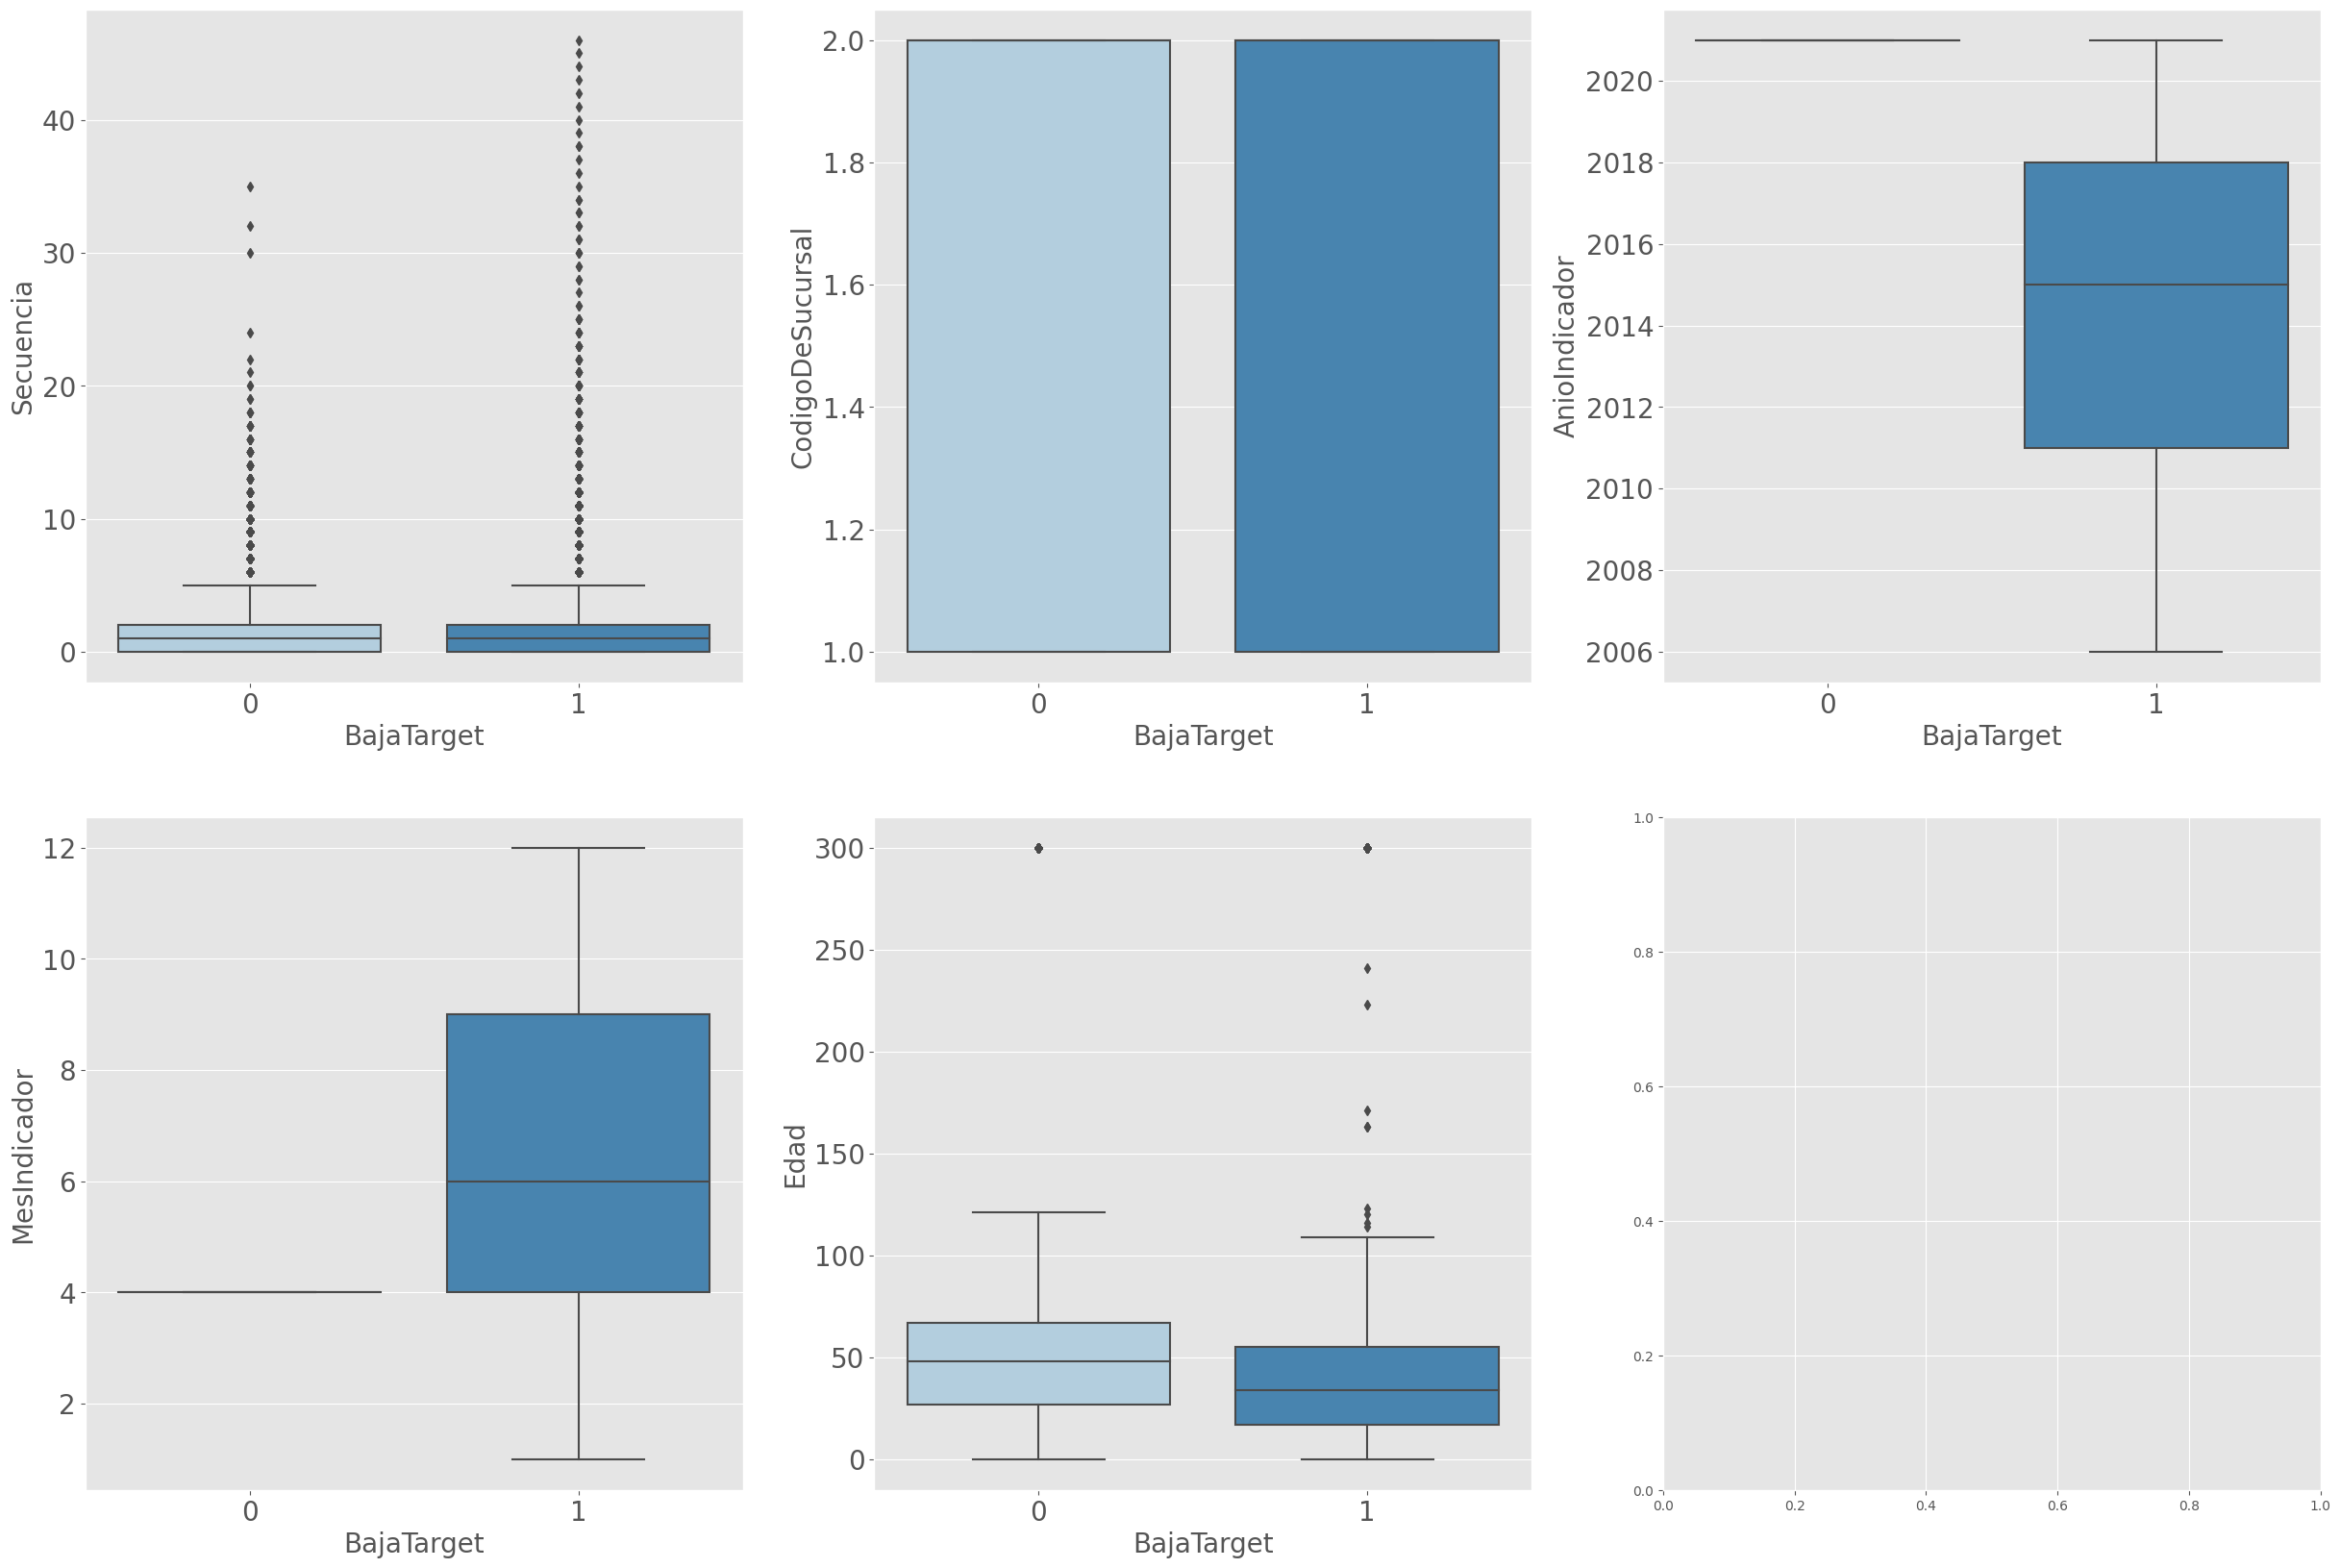

In [196]:
numeric_features_func(num_cols[0:5], 'BajaTarget' , df, 3)

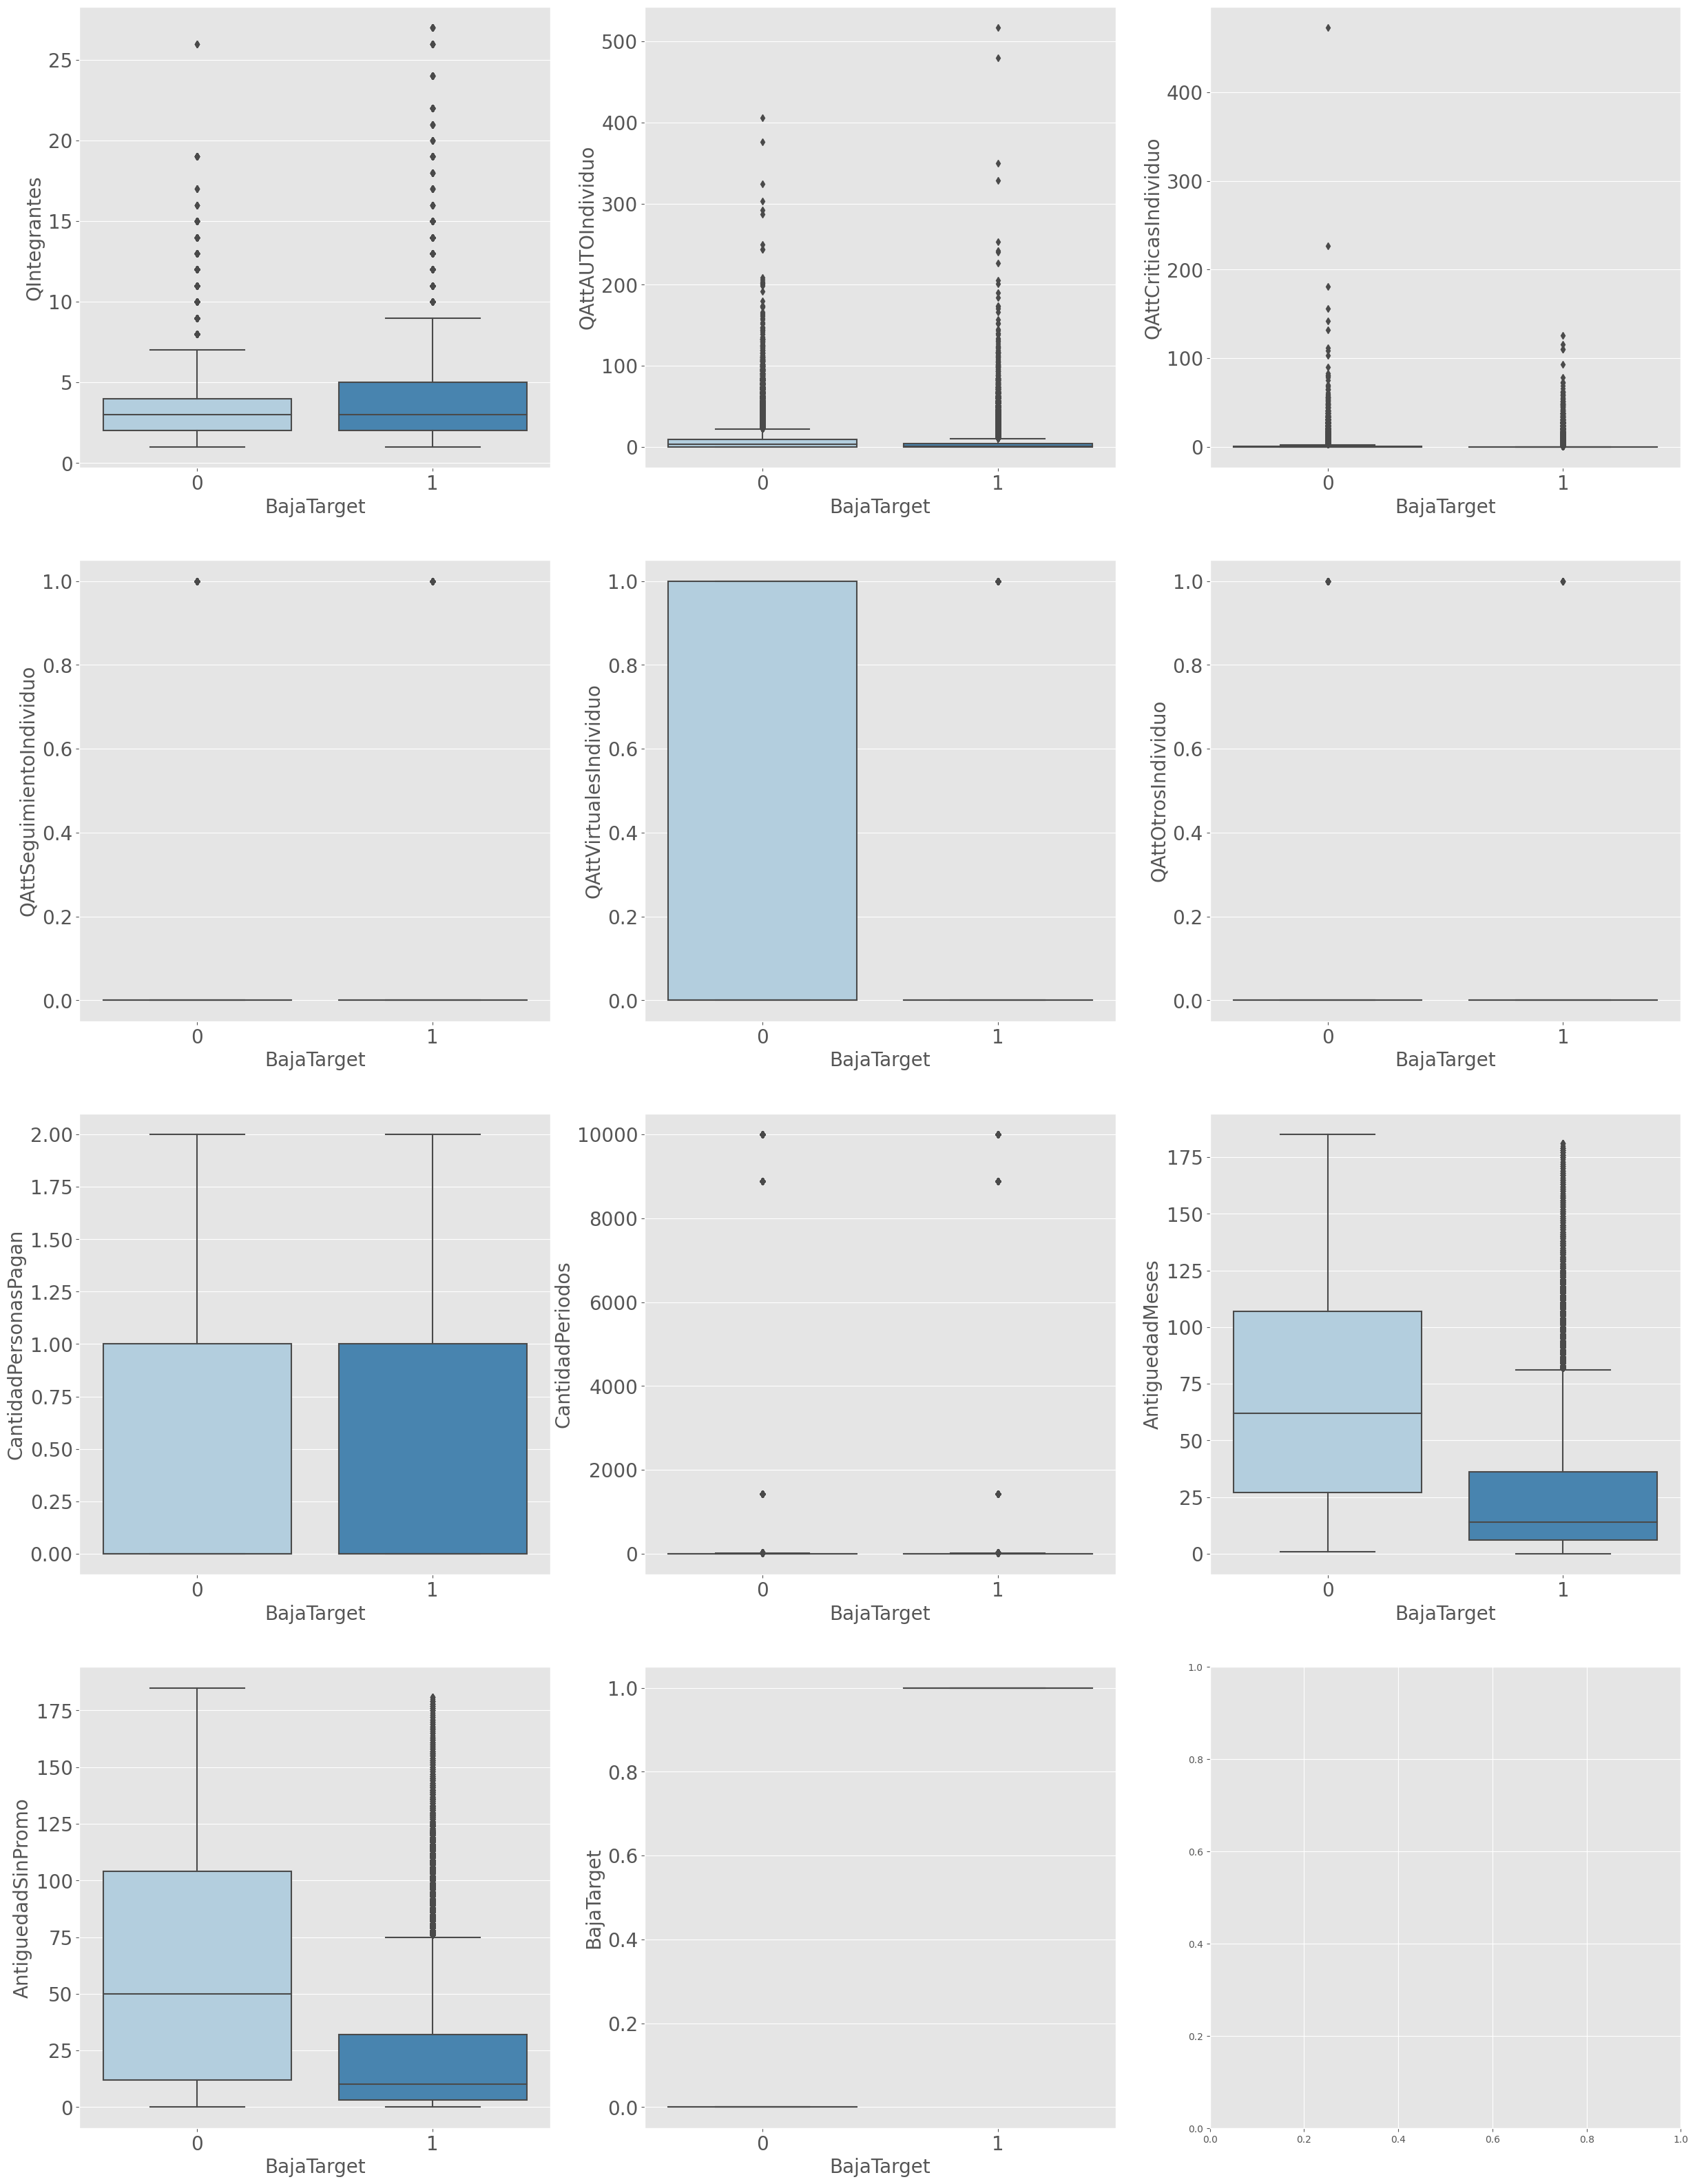

In [197]:
numeric_features_func(num_cols[5:], 'BajaTarget' , df, 3)

In [198]:
import math

In [199]:
df['Edad'] = np.where(df['Edad']>100,math.ceil(df['Edad'].mean()),df['Edad'])

In [200]:
df['CantidadPeriodos'] = np.where(df['CantidadPeriodos']>100,math.ceil(df['CantidadPeriodos'].median()),df['CantidadPeriodos'])

In [201]:
df['CantidadPeriodos'].unique()

array([ 0, 12,  9,  6,  4,  1,  3,  2,  5,  8, 24, 18, 15], dtype=int64)

In [202]:
df.describe().T

count         mean        std     min     25%  \
Secuencia                 304337.0     1.485304   1.828241     0.0     0.0   
CodigoDeSucursal          304337.0     1.624752   0.484188     1.0     1.0   
AnioIndicador             304337.0  2016.773928   4.476828  2006.0  2013.0   
MesIndicador              304337.0     5.563809   3.002197     1.0     4.0   
Edad                      304337.0    39.799669  24.230555     0.0    20.0   
QIntegrantes              304337.0     3.587273   2.130944     1.0     2.0   
QAttAUTOIndividuo         304337.0     4.767422   9.564825     0.0     0.0   
QAttCriticasIndividuo     304337.0     0.701410   2.753228     0.0     0.0   
QAttSeguimientoIndividuo  304337.0     0.036082   0.186494     0.0     0.0   
QAttVirtualesIndividuo    304337.0     0.152367   0.359377     0.0     0.0   
QAttOtrosIndividuo        304337.0     0.000273   0.016512     0.0     0.0   
CantidadPersonasPagan     304337.0     0.344963   0.476420     0.0     0.0   
CantidadPeriodos          304337.0     1.503416   3.267714     0.0     0.0   
AntiguedadMeses           304337.0    40.684048  41.390259     0.0     9.0   
AntiguedadSinPromo        304337.0    35.579098  42.242089     0.0     4.0   
BajaTarget                304337.0     0.666137   0.471592     0.0     0.0   

                             50%     75%     max  
Secuencia                    1.0     2.0    46.0  
CodigoDeSucursal             2.0     2.0     2.0  
AnioIndicador             2018.0  2021.0  2021.0  
MesIndicador                 4.0     8.0    12.0  
Edad                        39.0    60.0   100.0  
QIntegrantes                 3.0     5.0    27.0  
QAttAUTOIndividuo            1.0     5.0   517.0  
QAttCriticasIndividuo        0.0     0.0   473.0  
QAttSeguimientoIndividuo     0.0     0.0     1.0  
QAttVirtualesIndividuo       0.0     0.0     1.0  
QAttOtrosIndividuo           0.0     0.0     1.0  
CantidadPersonasPagan        0.0     1.0     2.0  
CantidadPeriodos             0.0     0.0    24.0  
AntiguedadMeses             23.0    62.0   185.0  
AntiguedadSinPromo          17.0    55.0   185.0  
BajaTarget                   1.0     1.0     1.0

In [203]:
y = df['BajaTarget']
df=df.drop(columns=['BajaTarget'])
df.head()

Secuencia  CodigoDeSucursal  AnioIndicador  MesIndicador TipoAfiliacion  \
0          1                 2           2021             4     Voluntario   
1          1                 2           2021             4     Voluntario   
2          1                 2           2009             9     Voluntario   
3          0                 2           2009             1     Individual   
4          0                 1           2021             4     Voluntario   

  DescripcionDeSexo EstadoMesIndicadores              Convenio  \
0          Femenino               Activo                 SUOEM   
1         Masculino               Activo                  UEPC   
2         Masculino           Suspendido                 SUOEM   
3          Femenino           Suspendido           SinConvenio   
4          Femenino               Activo  AMR MUTUAL AFILIADOS   

  DescripcionDeTipoDePago DescripcionDeInstitucionDeCobro  ...  \
0                Convenio                        Convenio  ...   
1                Convenio                        Convenio  ...   
2                Convenio                        Convenio  ...   
3          Débito tarjeta        TARJETA NARANJA- CORDOBA  ...   
4                Convenio                        Convenio  ...   

  ISinExpCriticas GSoloAttBanales  GSoloAttCriticas  GSinAtenciones  \
0               N               N                 N               N   
1               N               N                 S               N   
2               S               S                 N               N   
3               S               N                 N               S   
4               S               N                 N               N   

   GConAttAutoyCriticas  GSinExpAuto  GSinExpCriticas  AntiguedadMeses  \
0                     S            N                N              127   
1                     N            S                N               36   
2                     N            N                S               14   
3                     N            S                S                6   
4                     S            N                N              127   

   AntiguedadSinPromo  EstadoMora  
0                 127      Activo  
1                  36      Activo  
2                  14  Suspendido  
3                   0  Suspendido  
4                 127      Activo  

[5 rows x 36 columns]

In [204]:
y

0         0
1         0
2         1
3         1
4         0
         ..
304332    0
304333    1
304334    1
304335    0
304336    1
Name: BajaTarget, Length: 304337, dtype: int64

In [205]:
### Hacer todas las transaformaciones necesarias juntas con ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

In [206]:
#Como sabemos si se aplica el mismo encoder a Test, es decir que le de el mismo codigo a las mismas descripciones

le=LabelEncoder()
df['Convenio']=le.fit_transform(df['Convenio'])
df['DescripcionDeInstitucionDeCobro']=le.fit_transform(df['DescripcionDeInstitucionDeCobro'])


In [207]:


# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las columnas cualitativas
# Para mantener las columnas a las que no se les aplica ninguna transformación se tiene que indicar remainder='passthrough'.
num_cols = df.select_dtypes(include=['float64', 'int64', 'int32']).columns

label_cols = df[['Convenio', 'DescripcionDeInstitucionDeCobro']].columns

cat_cols = df.select_dtypes(include=['object', 'category']).columns


sublist=[x for x in cat_cols if x not in label_cols]
cat_cols=df[sublist].columns



preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), num_cols),
                    ('onehot', OneHotEncoder(drop='first'), cat_cols)
                    ],
                    remainder='passthrough')

In [208]:
data_prep = preprocessor.fit_transform(df)
#data_prep=data_prep.toarray() 

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [211]:
data_prep.shape

(304337, 42)

In [212]:
# Convertir el output en dataframe y añadir el nombre de las columnas
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names_out(cat_cols)
labels = np.concatenate([num_cols, encoded_cat])

data = pd.DataFrame(data_prep, columns=labels)

data.head()

Secuencia  CodigoDeSucursal  AnioIndicador  MesIndicador  Convenio  \
0  -0.265449          0.775007       0.943990     -0.520889  0.598617   
1  -0.265449          0.775007       0.943990     -0.520889  0.743549   
2  -0.265449          0.775007      -1.736484      1.144561  0.598617   
3  -0.812424          0.775007      -1.736484     -1.520159  0.611792   
4  -0.812424         -1.290310       0.943990     -0.520889 -2.392271   

   DescripcionDeInstitucionDeCobro      Edad  QIntegrantes  QAttAUTOIndividuo  \
0                        -0.670884 -0.528246     -0.744870           0.547066   
1                        -0.670884  1.452727     -0.275593          -0.498434   
2                        -0.670884 -0.363165      0.193683          -0.498434   
3                         1.458099  0.586052     -0.744870          -0.498434   
4                        -0.670884  1.205106     -0.275593          -0.289334   

   QAttCriticasIndividuo  ...  ISinExpAuto_S  ISinExpCriticas_S  \
0               0.471662  ...            0.0                0.0   
1               0.108451  ...            1.0                0.0   
2              -0.254760  ...            1.0                1.0   
3              -0.254760  ...            1.0                1.0   
4              -0.254760  ...            0.0                1.0   

   GSoloAttBanales_S  GSoloAttCriticas_S  GSinAtenciones_S  \
0                0.0                 0.0               0.0   
1                0.0                 1.0               0.0   
2                1.0                 0.0               0.0   
3                0.0                 0.0               1.0   
4                0.0                 0.0               0.0   

   GConAttAutoyCriticas_S  GSinExpAuto_S  GSinExpCriticas_S  \
0                     1.0            0.0                0.0   
1                     0.0            1.0                0.0   
2                     0.0            0.0                1.0   
3                     0.0            1.0                1.0   
4                     1.0            0.0                0.0   

   EstadoMora_Campaña  EstadoMora_Suspendido  
0                 0.0                    0.0  
1                 0.0                    0.0  
2                 0.0                    1.0  
3                 0.0                    1.0  
4                 0.0                    0.0  

[5 rows x 42 columns]

In [213]:
from sklearn.decomposition import PCA

In [214]:
#PCA
pca=PCA() 
#Se puede definir la cantidad de componentes Ej:pca=PCA(n_components=3)
#Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
X_pca=pca.fit_transform(data) 

In [215]:
# Porcentaje de varianza explicada acumulada
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('Porcentaje de varianza explicada acumulada')
print(prop_varianza_acum)

Porcentaje de varianza explicada acumulada
[0.17667574 0.29144688 0.37853258 0.44844364 0.50526288 0.55867984
 0.60694653 0.65420021 0.69693289 0.73614233 0.77225631 0.80605966
 0.83616494 0.86193342 0.88621461 0.90789605 0.92704243 0.94007923
 0.9519652  0.96344793 0.97120539 0.97822003 0.98420338 0.9882439
 0.99093945 0.99343563 0.99531171 0.99684356 0.99824664 0.99923341
 0.99974708 0.99991721 0.99996181 0.99999564 1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [216]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

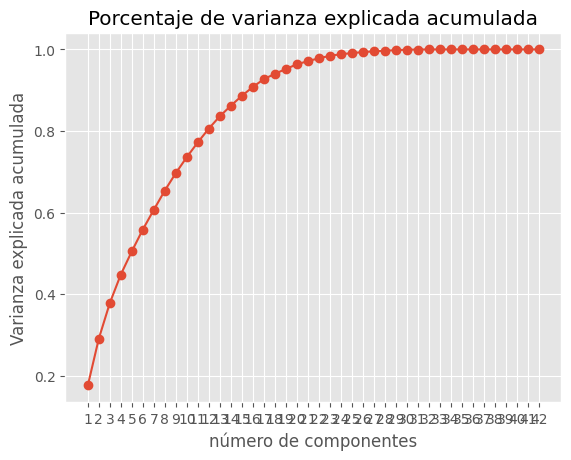

In [217]:
#Grafico varianza explicada acumulada
plt.plot(np.arange(len(data.columns)) + 1,prop_varianza_acum,marker = 'o')
plt.xticks(np.arange(pca.n_components_) + 1)
plt.xlabel('número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Porcentaje de varianza explicada acumulada');

In [218]:

#PCA
pca=PCA(n_components=12) 
X_pca=pca.fit_transform(data) 

In [219]:
X_pca

array([[ 2.98894117,  0.42891483, -0.14943582, ...,  0.49005913,
         0.28874062, -1.23268811],
       [ 0.42074551, -0.10983427, -1.29402659, ...,  0.29478139,
        -0.641671  , -0.85832817],
       [-1.77286052, -1.49699163,  0.07867662, ...,  0.1693671 ,
         0.07847431, -1.01304298],
       ...,
       [-0.04811529, -2.11781046, -1.78227146, ..., -1.17102985,
         0.12720291,  0.51379095],
       [ 3.10991646,  2.06421125,  0.05909091, ..., -1.06848982,
        -0.23740805,  0.72467779],
       [ 0.43058668, -1.73021414, -1.42909953, ..., -1.16108204,
        -1.26377543,  1.28857758]])

In [220]:
# Porcentaje de varianza explicada acumulada
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('Porcentaje de varianza explicada acumulada')
print(prop_varianza_acum)

Porcentaje de varianza explicada acumulada
[0.17667574 0.29144688 0.37853258 0.44844364 0.50526288 0.55867984
 0.60694653 0.65420021 0.69693289 0.73614233 0.77225628 0.80605962]


In [221]:
##Visualizar los eigenvectors
pd.DataFrame(
    data    = pca.components_,
    columns = data.columns,
    index=['PC1', 'PC2','PC3','PC4', 'PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12']
)

Secuencia  CodigoDeSucursal  AnioIndicador  MesIndicador  Convenio  \
PC1    0.012912         -0.106329       0.306240     -0.163998 -0.184574   
PC2   -0.170637          0.228597       0.144865     -0.085675  0.345475   
PC3    0.570479          0.158835      -0.093412      0.062218  0.106938   
PC4   -0.094388          0.277357      -0.364337      0.333642  0.056449   
PC5   -0.032397         -0.027836      -0.243599      0.243283  0.016128   
PC6    0.215682          0.221572       0.128640     -0.189612 -0.274166   
PC7    0.004359          0.097657      -0.001921     -0.032211 -0.010658   
PC8   -0.147592         -0.057768      -0.061401      0.403046 -0.367839   
PC9    0.151004         -0.598534       0.138894     -0.193666  0.160036   
PC10  -0.193271          0.476328      -0.106427     -0.590699 -0.092755   
PC11   0.002172          0.068834      -0.173195     -0.187281 -0.214787   
PC12   0.106758         -0.234668      -0.184588     -0.165267 -0.552478   

      DescripcionDeInstitucionDeCobro      Edad  QIntegrantes  \
PC1                         -0.182589  0.126981      0.013059   
PC2                          0.399488  0.186897     -0.091112   
PC3                          0.074631 -0.397559      0.578497   
PC4                          0.128186  0.175810      0.018911   
PC5                         -0.071629  0.040288     -0.018270   
PC6                         -0.235289  0.358962      0.331975   
PC7                          0.011056  0.047529      0.036921   
PC8                         -0.339138 -0.169198     -0.144154   
PC9                          0.000791 -0.104336     -0.080900   
PC10                        -0.176994 -0.185054     -0.132485   
PC11                         0.242092 -0.394203     -0.177059   
PC12                         0.488524  0.192760      0.024051   

      QAttAUTOIndividuo  QAttCriticasIndividuo  ...  ISinExpAuto_S  \
PC1            0.303612               0.196839  ...      -0.119802   
PC2            0.147846               0.203681  ...      -0.064392   
PC3            0.216225               0.000274  ...      -0.105300   
PC4            0.129566               0.280246  ...      -0.019726   
PC5            0.180623               0.430930  ...      -0.013213   
PC6           -0.205988               0.250056  ...       0.186103   
PC7           -0.050401              -0.048932  ...       0.030008   
PC8            0.190907               0.082763  ...      -0.100309   
PC9            0.206413               0.391799  ...       0.024268   
PC10           0.140985               0.103855  ...      -0.135855   
PC11           0.310001               0.123248  ...       0.244732   
PC12          -0.139079               0.052101  ...      -0.149867   

      ISinExpCriticas_S  GSoloAttBanales_S  GSoloAttCriticas_S  \
PC1           -0.098789          -0.024503           -0.003562   
PC2           -0.092464          -0.046420            0.001175   
PC3            0.001619           0.049911           -0.010200   
PC4           -0.100795          -0.082099            0.004108   
PC5           -0.107938          -0.073461            0.001264   
PC6           -0.087170          -0.212861            0.016918   
PC7            0.007743          -0.017322            0.001762   
PC8           -0.001921           0.072989           -0.007995   
PC9           -0.062753          -0.052166            0.003077   
PC10          -0.011103           0.087457           -0.006508   
PC11           0.071800          -0.106524           -0.000358   
PC12          -0.027565           0.092804           -0.002122   

      GSinAtenciones_S  GConAttAutoyCriticas_S  GSinExpAuto_S  \
PC1          -0.080841                0.108906      -0.084403   
PC2          -0.059740                0.104985      -0.058565   
PC3          -0.088259                0.048547      -0.098459   
PC4          -0.014615                0.092605      -0.010507   
PC5           0.003005                0.069192       0.004270   
PC6        

In [222]:
## Datset final con las CP calculadas
X_pca_df=pd.DataFrame(X_pca,columns=['PC1', 'PC2','PC3','PC4', 'PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])

In [223]:
data["BajaTarget"]=y

data.reset_index(inplace=True)
data_final=pd.concat([data,X_pca_df],axis=1)

In [224]:
def pca_graficos(num_cols, x_col, data, plot_columnas):

    plot_filas = math.ceil(len(num_cols)/plot_columnas)
    fig, axs = plt.subplots(plot_filas,plot_columnas, figsize=(10*plot_columnas,10*plot_filas))
    
    if plot_filas==1:
        for index, col in enumerate(num_cols):
            sns.scatterplot( x="PC1", y=col, data=data, hue=x_col, ax = axs[index])
            ax=axs[index]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(x_col, fontsize=20)  
            ax.set_ylabel(col, fontsize=20)
    else:
        for index, col in enumerate(num_cols):
            axs_fila = index // plot_columnas
            axs_col = index % plot_columnas
            sns.scatterplot( x="PC1", y=col, data=data, hue=x_col, ax = axs[axs_fila][axs_col])
            ax=axs[axs_fila][axs_col]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(col, fontsize=20)  
            ax.set_ylabel('PC1', fontsize=20)

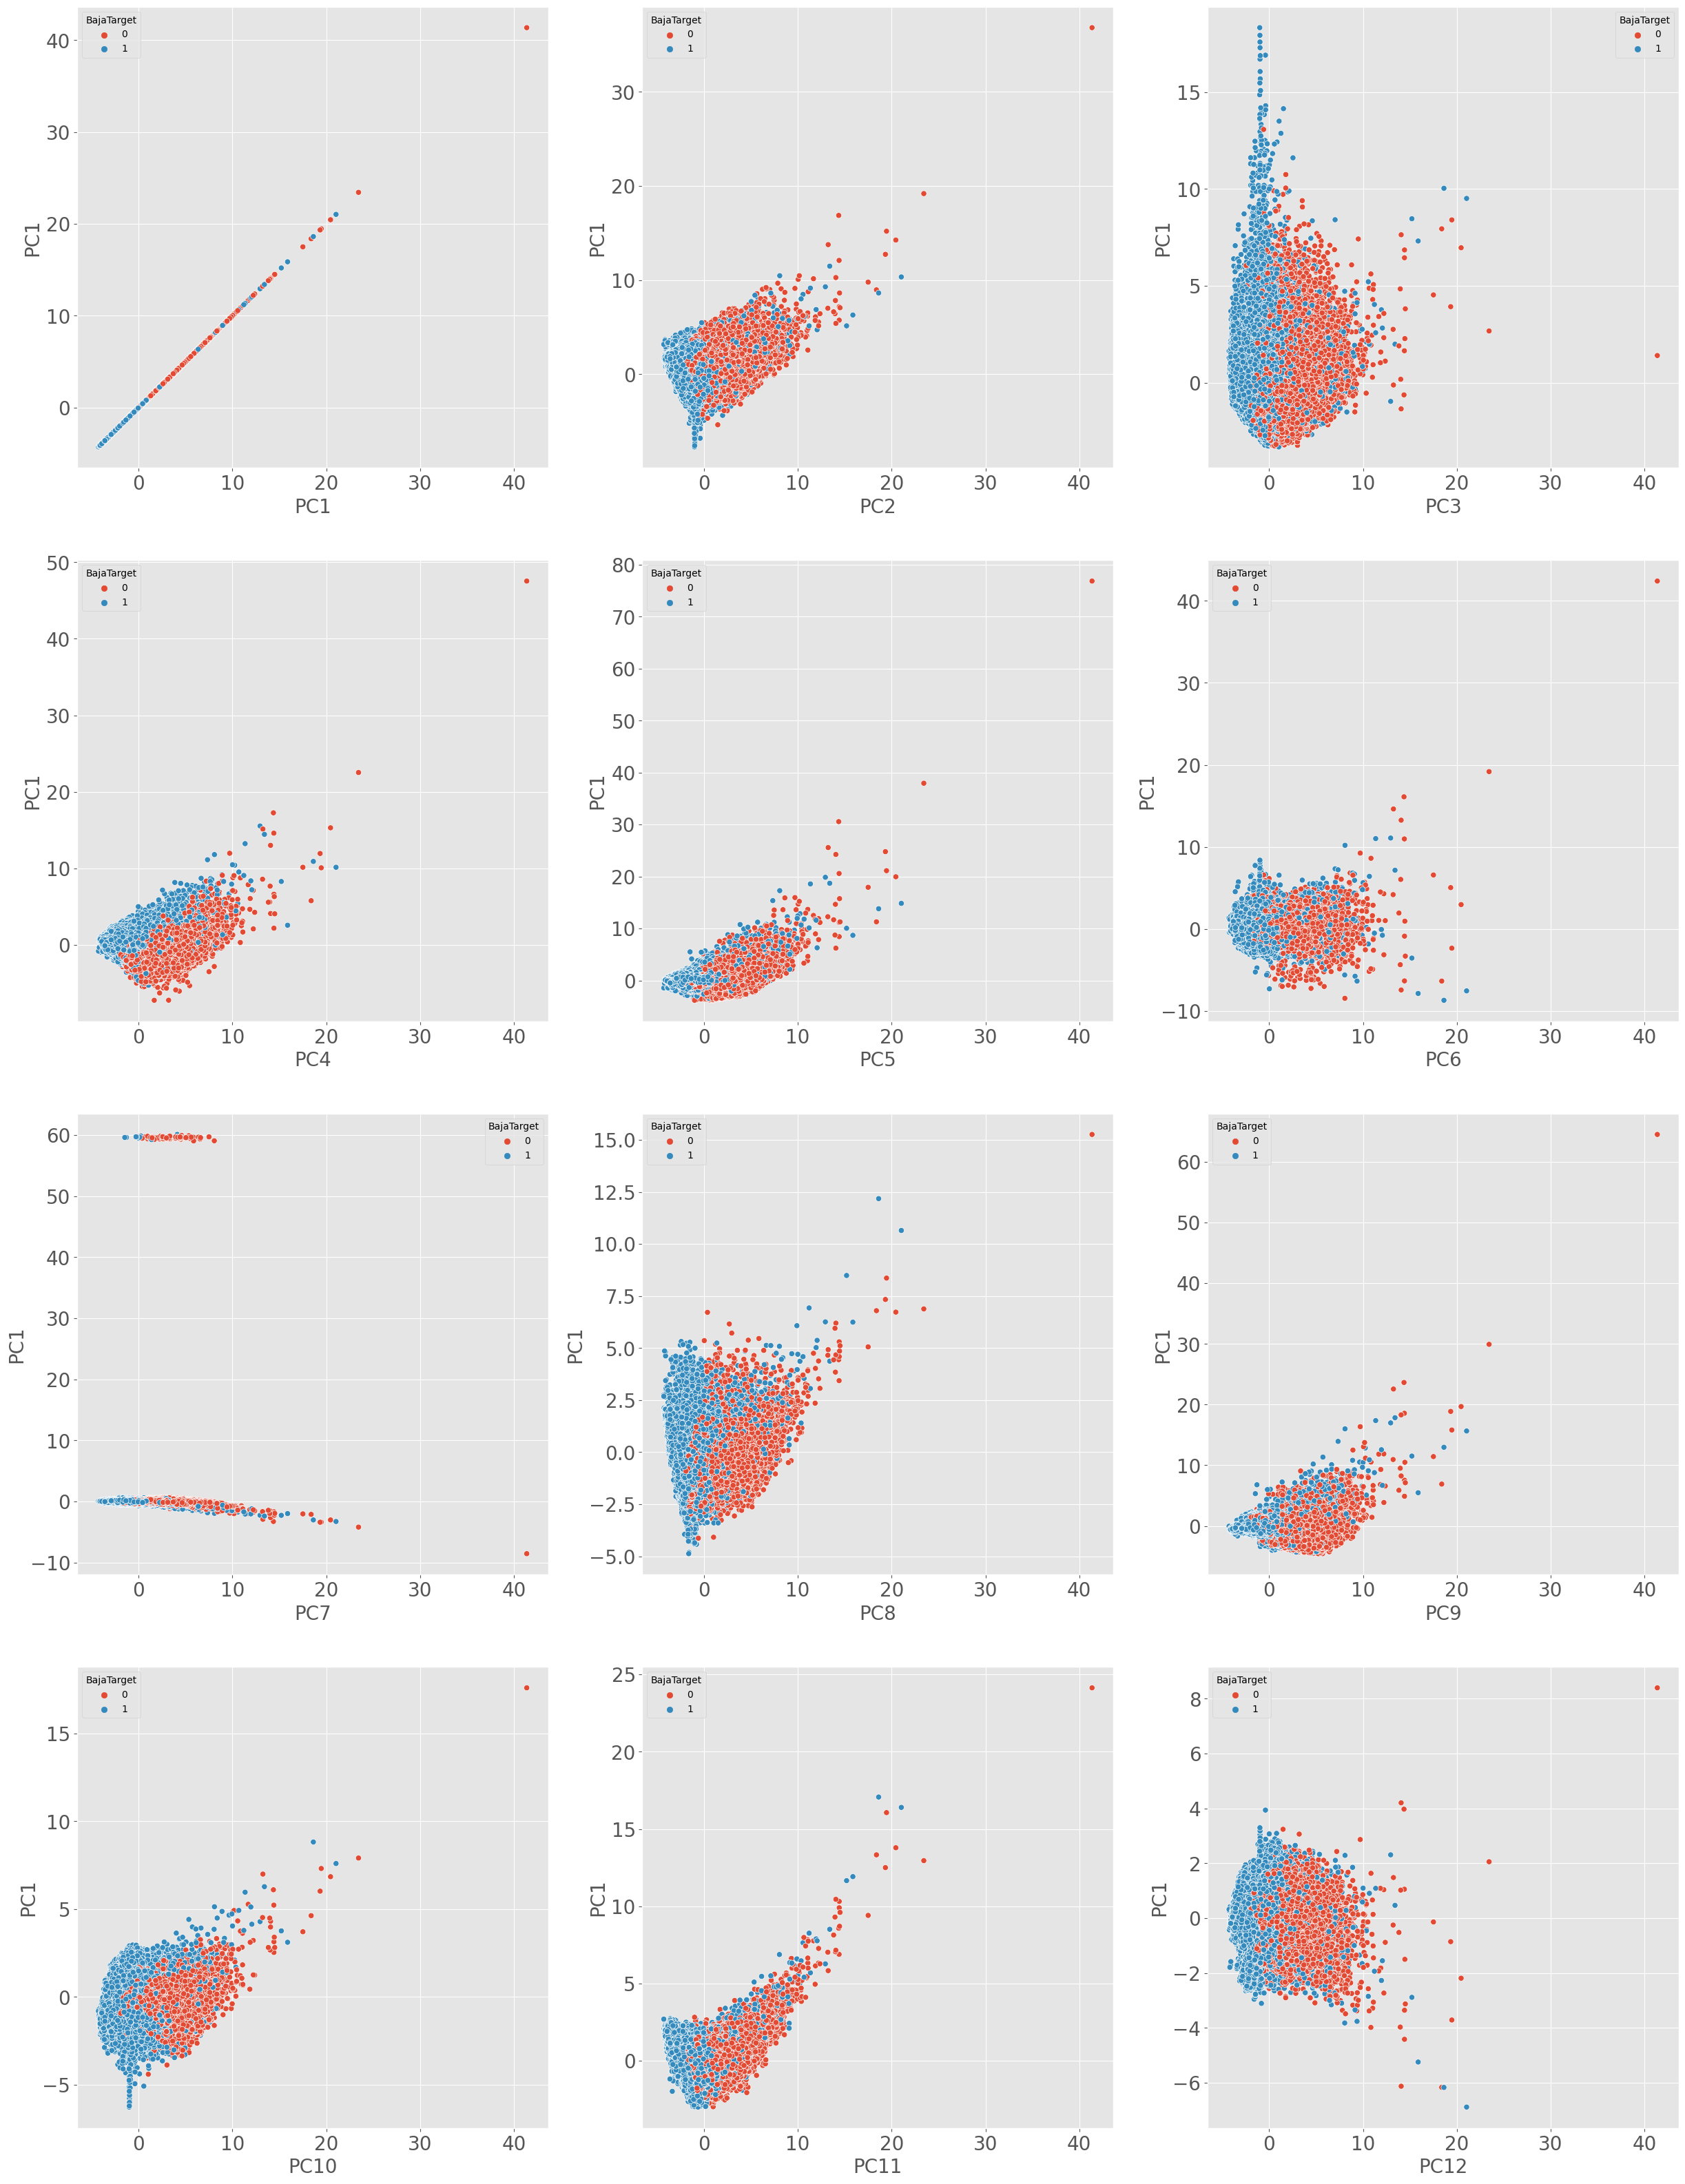

In [225]:
componentes = ['PC1', 'PC2','PC3','PC4', 'PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12']
pca_graficos(componentes,'BajaTarget',data_final,3)

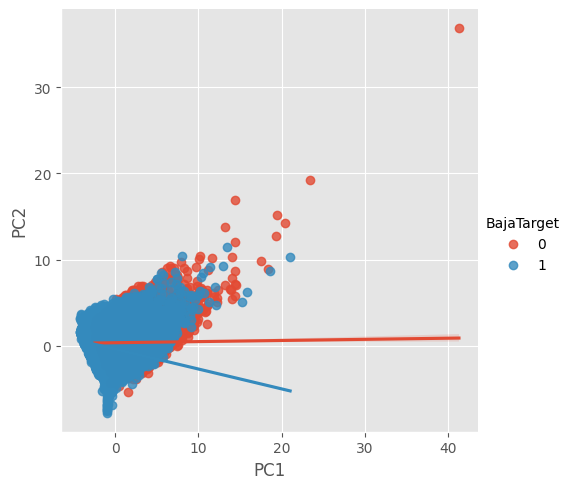

In [226]:
#Grafico
sns.lmplot( x="PC1", y="PC2", data=data_final, hue='BajaTarget')

In [227]:
X = data.drop(columns = ['BajaTarget'])
y = data['BajaTarget'].astype('int32')

In [228]:
# import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split


# split the dataset into train and test set with 80% and 20% respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 1234)

print(X_train.shape, X_test.shape)

(243469, 43) (60868, 43)


In [229]:
print(y_train.shape, y_test.shape)

(243469,) (60868,)


In [230]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingRandomSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_val_predict


# Definir los parámetros para cada modelo
parameters = {
    'DecisionTreeClassifier': {'criterion': ['gini', 'entropy'],'max_depth': [50, 100, 150], 'random_state': [256, 512, 1024] },
    'AdaBoostClassifier': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0]},
    'RandomForestClassifier': {'n_estimators': [50, 100, 200], 'criterion': ['gini', 'entropy']},
    'GaussianNB': {'var_smoothing': [1e-6, 1e-9, 1e-12] },
    'KNeighborsClassifier': {'n_neighbors': [2, 3, 5, 7]},
    'Perceptron': {'random_state': [1,2,4] , 'tol': [1e-2, 1e-4, 1e-6], 'alpha': [0.0001, 0.001, 0.01]}
}

#parameters = {
#    'DecisionTreeClassifier': {'criterion': ['gini', 'entropy']},
#    'AdaBoostClassifier': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0]},
#    'RandomForestClassifier': {'n_estimators': [50, 100, 200], 'criterion': ['gini', 'entropy']},
#    'GaussianNB': {},
#    'KNeighborsClassifier': {'n_neighbors': [3, 5, 7]},
#    'Perceptron': {'alpha': [0.0001, 0.001, 0.01]}
#}


#parameters = {
#    'DecisionTreeClassifier': {'criterion': ['gini', 'entropy']},
#    'AdaBoostClassifier': {'n_estimators': [50], 'learning_rate': [0.5, 1.0]},
#    'RandomForestClassifier': {'n_estimators': [50], 'criterion': ['gini', 'entropy']},
#    'GaussianNB': {'var_smoothing': [1e-6, 1e-9]},
#    'KNeighborsClassifier': {'n_neighbors': [2]},
#    'Perceptron': {'random_state': [2], 'alpha': [ 0.001, 0.01]}
#}

# Crear una lista de los clasificadores a evaluar
classifiers = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'Perceptron': Perceptron()
}

# Realizar la búsqueda en la cuadrícula para cada clasificador
models = []

for classifier_name, classifier in classifiers.items():
    print("Evaluando:", classifier_name)
    clf = HalvingRandomSearchCV(classifier, parameters[classifier_name], cv=StratifiedKFold(n_splits=5))
    clf.fit(X_train, y_train)
    print("Mejores parámetros encontrados:", clf.best_params_)
    print("Puntuación media de validación cruzada:", clf.best_score_)
    print("----------------------------------------")
    model_item = {'name': classifier_name, 'params': clf.best_params_}
    models.append(model_item)
    print(models)


Evaluando: DecisionTreeClassifier


c:\Users\jcalabozo\Anaconda3\envs\JCA-Curso_TechBI\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 18 is smaller than n_iter=12173. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parámetros encontrados: {'random_state': 512, 'max_depth': 50, 'criterion': 'gini'}
Puntuación media de validación cruzada: 0.9215873015873015
----------------------------------------
[{'name': 'DecisionTreeClassifier', 'params': {'random_state': 512, 'max_depth': 50, 'criterion': 'gini'}}]
Evaluando: AdaBoostClassifier


c:\Users\jcalabozo\Anaconda3\envs\JCA-Curso_TechBI\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=12173. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parámetros encontrados: {'n_estimators': 200, 'learning_rate': 1.0}
Puntuación media de validación cruzada: 0.8990476190476191
----------------------------------------
[{'name': 'DecisionTreeClassifier', 'params': {'random_state': 512, 'max_depth': 50, 'criterion': 'gini'}}, {'name': 'AdaBoostClassifier', 'params': {'n_estimators': 200, 'learning_rate': 1.0}}]
Evaluando: RandomForestClassifier


c:\Users\jcalabozo\Anaconda3\envs\JCA-Curso_TechBI\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=12173. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parámetros encontrados: {'n_estimators': 200, 'criterion': 'entropy'}
Puntuación media de validación cruzada: 0.9333333333333332
----------------------------------------
[{'name': 'DecisionTreeClassifier', 'params': {'random_state': 512, 'max_depth': 50, 'criterion': 'gini'}}, {'name': 'AdaBoostClassifier', 'params': {'n_estimators': 200, 'learning_rate': 1.0}}, {'name': 'RandomForestClassifier', 'params': {'n_estimators': 200, 'criterion': 'entropy'}}]
Evaluando: GaussianNB


c:\Users\jcalabozo\Anaconda3\envs\JCA-Curso_TechBI\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=12173. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parámetros encontrados: {'var_smoothing': 1e-12}
Puntuación media de validación cruzada: 0.9666666666666666
----------------------------------------
[{'name': 'DecisionTreeClassifier', 'params': {'random_state': 512, 'max_depth': 50, 'criterion': 'gini'}}, {'name': 'AdaBoostClassifier', 'params': {'n_estimators': 200, 'learning_rate': 1.0}}, {'name': 'RandomForestClassifier', 'params': {'n_estimators': 200, 'criterion': 'entropy'}}, {'name': 'GaussianNB', 'params': {'var_smoothing': 1e-12}}]
Evaluando: KNeighborsClassifier


c:\Users\jcalabozo\Anaconda3\envs\JCA-Curso_TechBI\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=12173. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parámetros encontrados: {'n_neighbors': 5}
Puntuación media de validación cruzada: 0.5393939393939394
----------------------------------------
[{'name': 'DecisionTreeClassifier', 'params': {'random_state': 512, 'max_depth': 50, 'criterion': 'gini'}}, {'name': 'AdaBoostClassifier', 'params': {'n_estimators': 200, 'learning_rate': 1.0}}, {'name': 'RandomForestClassifier', 'params': {'n_estimators': 200, 'criterion': 'entropy'}}, {'name': 'GaussianNB', 'params': {'var_smoothing': 1e-12}}, {'name': 'KNeighborsClassifier', 'params': {'n_neighbors': 5}}]
Evaluando: Perceptron


c:\Users\jcalabozo\Anaconda3\envs\JCA-Curso_TechBI\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 27 is smaller than n_iter=12173. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parámetros encontrados: {'tol': 0.0001, 'random_state': 2, 'alpha': 0.001}
Puntuación media de validación cruzada: 0.554344063689858
----------------------------------------
[{'name': 'DecisionTreeClassifier', 'params': {'random_state': 512, 'max_depth': 50, 'criterion': 'gini'}}, {'name': 'AdaBoostClassifier', 'params': {'n_estimators': 200, 'learning_rate': 1.0}}, {'name': 'RandomForestClassifier', 'params': {'n_estimators': 200, 'criterion': 'entropy'}}, {'name': 'GaussianNB', 'params': {'var_smoothing': 1e-12}}, {'name': 'KNeighborsClassifier', 'params': {'n_neighbors': 5}}, {'name': 'Perceptron', 'params': {'tol': 0.0001, 'random_state': 2, 'alpha': 0.001}}]


In [231]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sn

def train_model(model_name, params, X_train, y_train, X_test, y_test, ax_cm=None, ax_roc=None):
    if model_name == 'DecisionTreeClassifier':
        model = DecisionTreeClassifier(**params)
    elif model_name == 'AdaBoostClassifier':
        model = AdaBoostClassifier(**params)
    elif model_name == 'RandomForestClassifier':
        model = RandomForestClassifier(**params)
    elif model_name == 'GaussianNB':
        model = GaussianNB(**params)
    elif model_name == 'KNeighborsClassifier':
        model = KNeighborsClassifier(**params)
    elif model_name == 'Perceptron':
        model = Perceptron(**params)
    else:
        raise ValueError("Invalid model name. Please choose from Decision Tree, AdaBoost, Random Forest, Naïve Bayes, KNN, or Perceptron.")
    
    # Train the model
    
    model.fit(X_train,y_train)
    
    # Make predictions
    y_pred = model.predict(X = X_test)

    # Evaluate the model

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    if ax_cm:
        sn.heatmap(cm, annot=True, linewidths=0.8, fmt='d', cmap='Blues', ax=ax_cm, cbar=False)
        ax_cm.set_xlabel('Predicted', fontsize=16)
        ax_cm.set_ylabel('Truth', fontsize=16)
        ax_cm.set_title(f"{model_name} (Acc: {accuracy:.2f})", fontsize=18, pad=20)
    
    # Plot ROC curve
    if ax_roc and hasattr(model, 'predict_proba'):
        y_score = model.predict_proba(X_test)
        yes_probs = y_score[:, 1]
        fpr, tpr, _ = roc_curve(y_test, yes_probs)
        roc_auc = auc(fpr, tpr)
        ax_roc.plot(fpr, tpr, marker='_', label=f'{model_name} (AUC = {roc_auc:.2f})')
        ax_roc.set_title(f"ROC Curve - {model_name}", fontsize=18, pad=20)

    
    print(f"Classification report <{model_name}>")
    print(report)
    
    return model

Classification report <DecisionTreeClassifier>
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     20278
           1       0.96      0.96      0.96     40590

    accuracy                           0.94     60868
   macro avg       0.94      0.94      0.94     60868
weighted avg       0.94      0.94      0.94     60868

Classification report <AdaBoostClassifier>
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     20278
           1       1.00      0.95      0.97     40590

    accuracy                           0.97     60868
   macro avg       0.95      0.97      0.96     60868
weighted avg       0.97      0.97      0.97     60868

Classification report <RandomForestClassifier>
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     20278
           1       1.00      0.95      0.97     40590

    accuracy                           0.97  

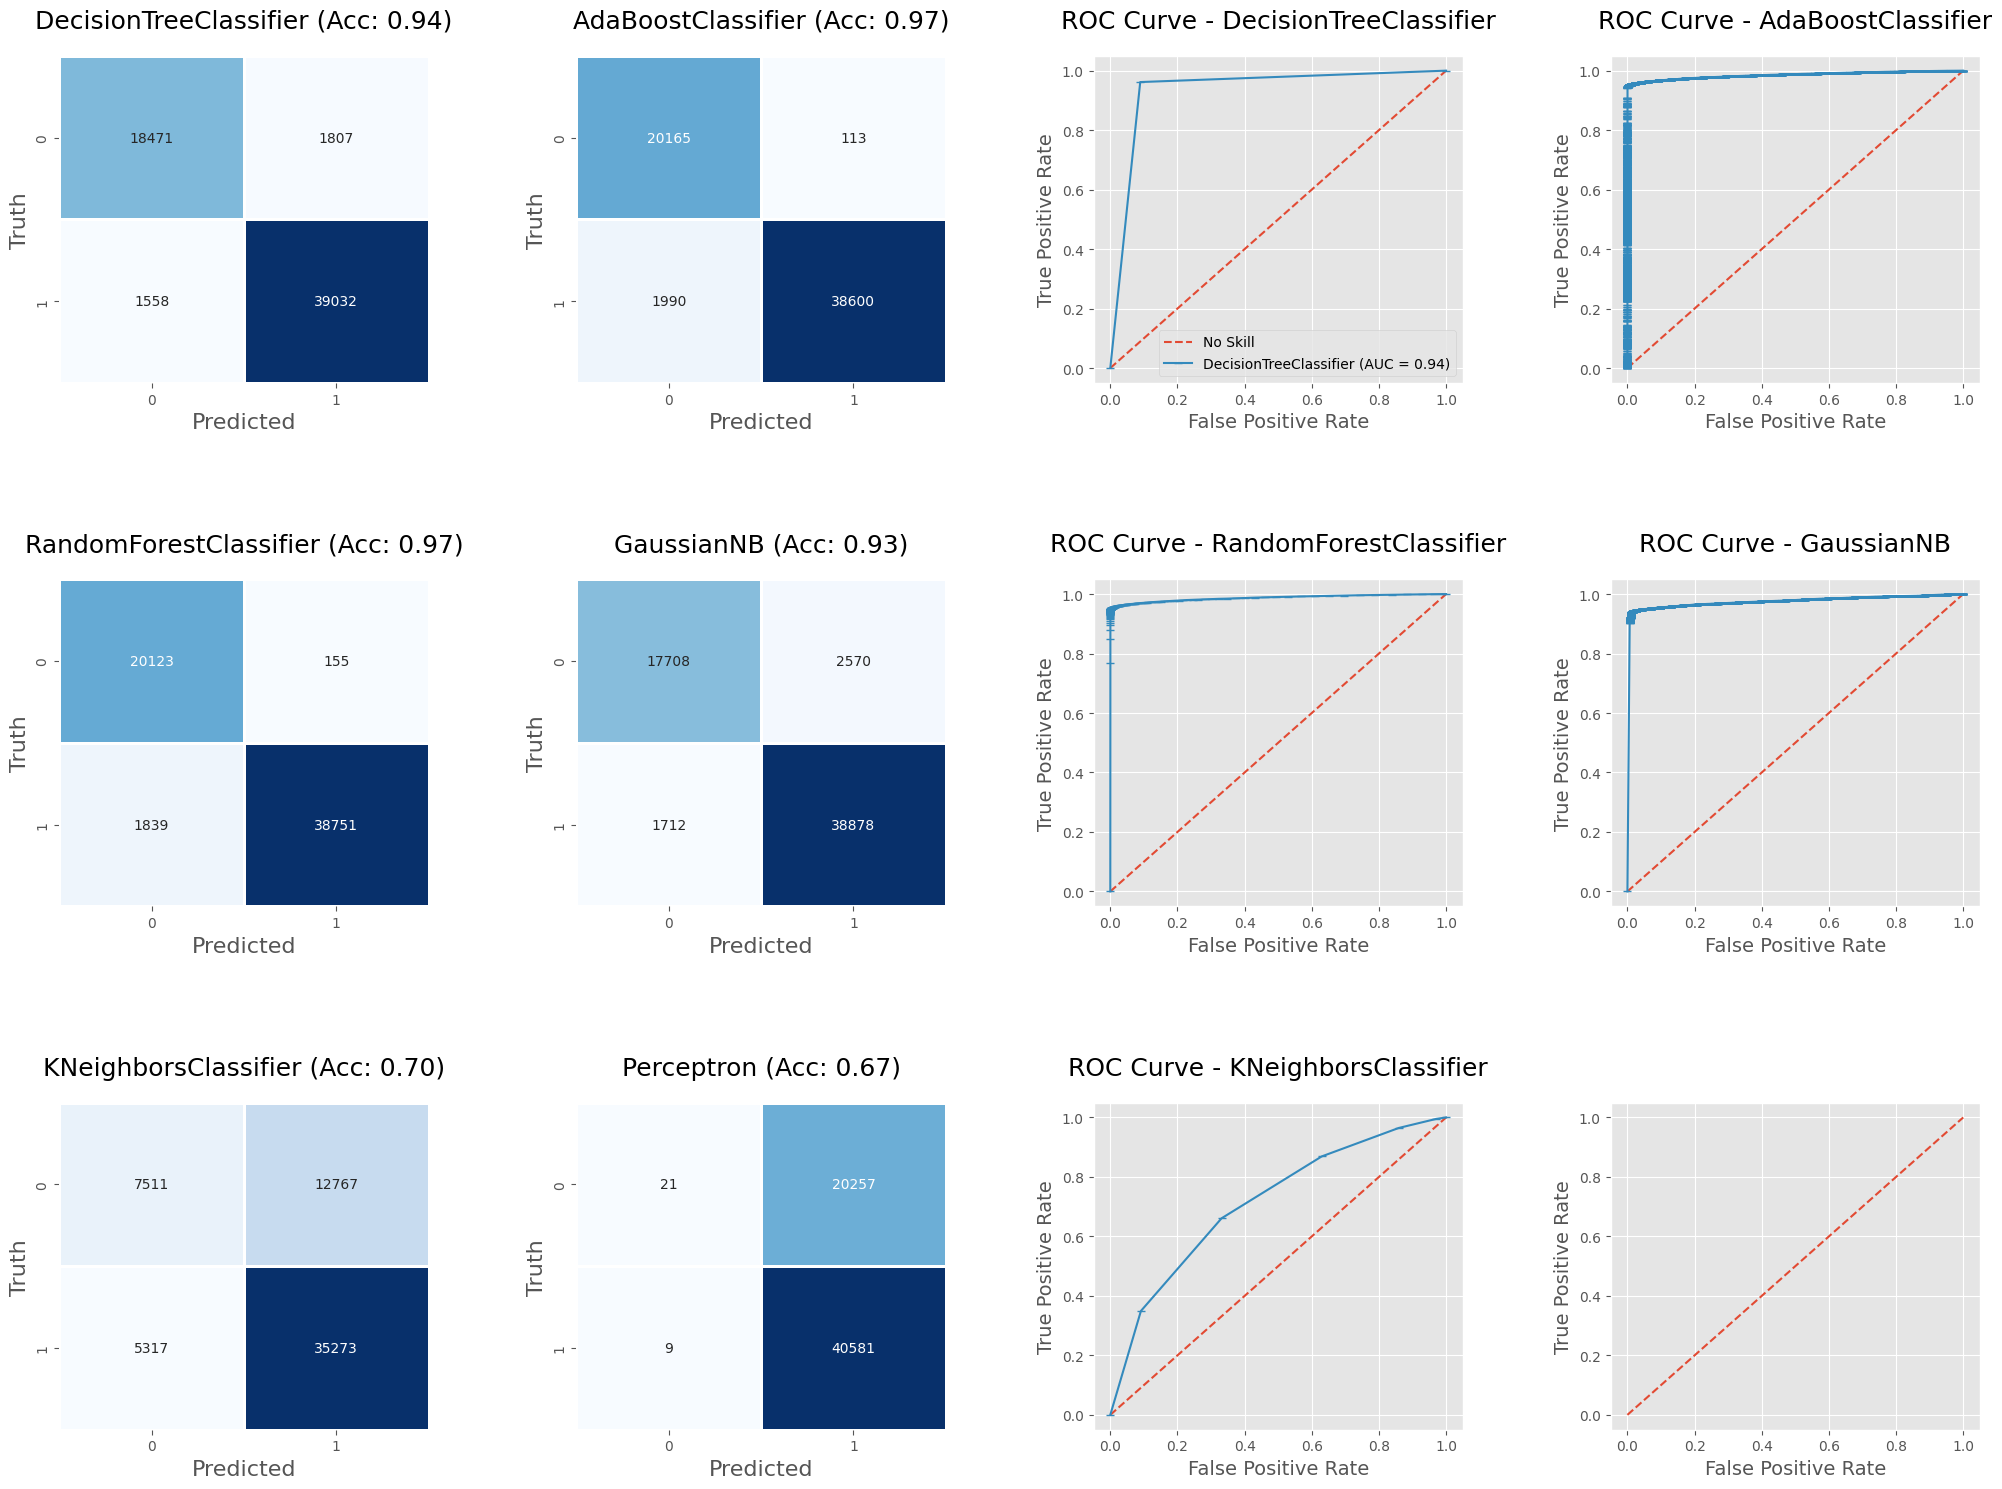

In [232]:
#models = [
#    {'name': 'Decision Tree', 'params': {'criterion': 'entropy', 'max_depth': 100, 'random_state': 1024}},
#    {'name': 'AdaBoost', 'params': {'n_estimators': 50, 'learning_rate': 1}},
#    {'name': 'Random Forest', 'params': {'criterion': 'entropy'}},
#    {'name': 'Naïve Bayes', 'params': {'var_smoothing': 1e-9}},
#    {'name': 'KNN', 'params': {'n_neighbors': 2}},
#    {'name': 'Perceptron', 'params': {'random_state': 2, 'tol': 1e-4}},
#]

# Plotting confusion matrices and ROC curves for all models in a 3x3 grid
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
cm_axes = axes[:, :2].ravel()
roc_axes = axes[:, 2:].ravel()

# Plot "No-Skill" on ROC Curve
for ax in roc_axes:
    ax.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
    ax.set_xlabel("False Positive Rate", fontsize=14)
    ax.set_ylabel("True Positive Rate", fontsize=14)

for idx, model_info in enumerate(models):
    train_model(model_info['name'], model_info['params'], X_train, y_train, X_test, y_test, ax_cm=cm_axes[idx], ax_roc=roc_axes[idx])

# Set the legend for ROC curves
roc_axes[0].legend()

fig.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.6)  # Add margins between subplots
plt.show()